<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/M5ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU Usage

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Sep  8 11:32:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


# Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Read in the data sets
dataset = pd.read_csv('/content/Datasetv2.csv')
property_dataset = pd.read_csv('/content/Property data  raw 2.csv')

# Quick Look at the two property datasets

# PROPERTY DATASET

Quick look at the dataset provided by Centaline Properties (essentially a list of 156,000 property transactions in Hong Kong over a period of 3 years)

In [ ]:
dataset.head(20)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,Block,Rental,Public Housing,floor
0,0,9/3/2023,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,NaN,NaN,True,False,13.0
1,1,9/3/2023,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,NaN,NaN,True,False,22.0
2,2,8/3/2023,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,NaN,1,True,False,7.0
3,3,8/3/2023,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,NaN,NaN,True,False,22.0
4,4,8/3/2023,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,NaN,NaN,True,False,22.0
5,5,8/3/2023,"Eltanin Square Mile, Tower 1, Upper Floor, Flat G",14300,--,255,56,Kowloon Kowloon City District,1,G,NaN,NaN,True,False,22.0
6,6,8/3/2023,"Cetus Square Mile, Tower 1, Lower Floor, Flat G",12000,--,194,62,Kowloon Kowloon City District,1,G,NaN,NaN,True,False,7.0
7,7,8/3/2023,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,2,NaN,False,False,22.0
8,8,8/3/2023,"Metro Harbour View, Phase 1, Tower 3, Upper Fl...",16000,--,386,41,Kowloon Kowloon City District,3,B,1,NaN,True,False,22.0
9,9,8/3/2023,"Celestial Heights, Phase 2, 22 Celestial Avenu...",38000,--,"1,155",33,Kowloon Kowloon City District,NaN,NaN,2,NaN,True,False,13.0


In [ ]:
dataset.shape

(159676, 15)

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'Rental', 'Public Housing', 'floor'],
      dtype='object')

In [ ]:
# Check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
dtypes: bool(2), float

# MARCO INDICIES DATASET

Quick look at the macro economic indicies dataset which contains indicators that could impact the change in property prices. The information is based on statistics provided by the Government of Hong Kong

In [ ]:
property_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15 non-null     object 
 1   2020Q1      15 non-null     float64
 2   2020Q2      15 non-null     float64
 3   2020Q3      15 non-null     float64
 4   2020Q4      15 non-null     float64
 5   2021Q1      15 non-null     float64
 6   2021Q2      15 non-null     float64
 7   2021Q3      15 non-null     float64
 8   2021Q4      15 non-null     float64
 9   2022Q1      15 non-null     float64
 10  2022Q2      15 non-null     float64
 11  2022Q3      15 non-null     float64
 12  2022Q4      15 non-null     float64
 13  2023Q1      15 non-null     float64
 14  2023Q2      15 non-null     float64
 15  2023Q3      15 non-null     float64
 16  2023Q4      15 non-null     float64
dtypes: float64(16), object(1)
memory usage: 2.1+ KB


In [ ]:
# Create a dictionary of descriptions
descriptions = {
    'CPI': 'Consumer Price Index',
    'IR': 'Interest Rate',
    'MW': 'Monthly Wage',
    'M3': 'Money Supply M3',
    'SD': 'Savings Deposit',
    'UR': 'Unemployment Rate',
    'GDP': 'Gross Domestic Product',
    'CI': 'Consumer Confidence Index',
    'SM': 'Stock Market',
    'LTV': 'Loan to Value',
    'HS': 'Housing Starts',
    'SOLD': 'Number of Properties Sold',
    'PG': 'Population Growth',
    'CG': 'China Growth',
    'PI': 'Property price changes'
}

# Map /add descriptions to the dataset_datasetFrame
property_dataset['Description'] = property_dataset['Unnamed: 0'].map(descriptions)

# Display the updated dataset_datasetFrame
property_dataset.head(20)

,Unnamed: 0,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,Description
0,CPI,0.80,0.80,0.80,0.80,0.90,0.90,0.90,0.90,1.80,1.80,1.80,1.80,2.00,2.00,2.00,2.00,Consumer Price Index
1,IR,2.00,0.86,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,2.00,3.50,4.75,5.50,5.75,5.75,Interest Rate
2,MW,17.00,17.00,17.10,16.90,16.80,17.00,17.20,17.20,17.10,17.30,17.50,17.60,17.70,18.00,18.30,18.40,Monthly Wage
3,M3,14.80,14.90,15.90,15.60,15.90,16.00,16.00,16.20,16.50,16.30,16.30,16.40,16.50,16.50,16.80,17.10,Money Supply M3
4,SD,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.08,0.08,0.08,0.08,0.08,Savings Deposit
5,UR,3.70,5.90,6.20,6.20,7.20,6.00,4.60,4.10,4.50,5.10,4.10,3.70,3.30,3.00,2.90,2.90,Unemployment Rate
6,GDP,86.24,86.24,86.24,86.24,92.23,92.23,92.23,92.23,89.96,89.96,89.96,89.96,91.40,91.40,91.40,91.40,Gross Domestic Product
7,CI,62.90,52.30,59.80,63.80,66.60,66.80,68.00,63.40,50.60,53.70,43.90,28.30,66.10,61.00,52.60,51.00,Consumer Confidence Index
8,SM,27.90,24.20,25.10,26.50,28.90,29.10,24.80,23.99,21.91,20.72,17.75,19.90,20.58,19.45,17.95,17.45,Stock Market
9,LTV,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,Loan to Value


In [ ]:
# Look at the averages for the macroeconomic dataset
descriptions = {
    'CPI': 'Consumer Price Index',
    'IR': 'Interest Rate',
    'MW': 'Monthly Wage',
    'M3': 'Money Supply M3',
    'SD': 'Savings Deposit',
    'UR': 'Unemployment Rate',
    'GDP': 'Gross Domestic Product',
    'CI': 'Consumer Confidence Index',
    'SM': 'Stock Market',
    'LTV': 'Loan to Value',
    'HS': 'Housing Starts',
    'SOLD': 'Number of Properties Sold',
    'PG': 'Population Growth',
    'CG': 'China Growth',
    'PI': 'Property price changes'
}

# Map/add descriptions to the dataset
property_dataset['Description'] = property_dataset['Unnamed: 0'].map(descriptions)

# Calculate row-wise averages for numeric columns
property_dataset['Row_Average'] = property_dataset.iloc[:, 1:].mean(axis=1, numeric_only=True)

# Display the updated dataset with descriptions and row averages
print(property_dataset)

   Unnamed: 0    2020Q1    2020Q2    2020Q3    2020Q4    2021Q1    2021Q2  \
0         CPI      0.80      0.80      0.80      0.80      0.90      0.90   
1          IR      2.00      0.86      0.50      0.50      0.50      0.50   
2          MW     17.00     17.00     17.10     16.90     16.80     17.00   
3          M3     14.80     14.90     15.90     15.60     15.90     16.00   
4          SD      0.15      0.15      0.15      0.15      0.15      0.15   
5          UR      3.70      5.90      6.20      6.20      7.20      6.00   
6         GDP     86.24     86.24     86.24     86.24     92.23     92.23   
7          CI     62.90     52.30     59.80     63.80     66.60     66.80   
8          SM     27.90     24.20     25.10     26.50     28.90     29.10   
9         LTV      0.50      0.50      0.50      0.50      0.50      0.50   
10         HS   6925.00   6925.00   6925.00   6925.00   5300.00   5300.00   
11       SOLD  18331.00  18331.00  18331.00  18331.00  24033.00  24033.00   

# Merge both datasets and switch around columns of the macro economic indicies dataset

In [ ]:
# Merger dataset and pivot row and columns of peoperty dataset
# Define the function to convert date to year-quarter format
def get_year_quarter(date_str):
    date_formats = ['%d-%m-%y', '%d/%m/%y', '%Y-%m-%d', '%m/%d/%y', '%d.%m.%Y', '%d-%m-%Y', '%d/%m/%Y']
    for fmt in date_formats:
        try:
            date = datetime.strptime(date_str, fmt)
            year = date.year
            quarter = (date.month - 1) // 3 + 1
            return date.strftime('%d-%m-%y'), f"{year}Q{quarter}"
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized: {date_str}")

# Extract date and quarter info from the dataset
dataset[['date', 'YearQuarter']] = dataset['date'].apply(lambda x: pd.Series(get_year_quarter(x)))

# Melt the property data to have a long format
property_dataset_melted = property_dataset.melt(id_vars=[property_dataset.columns[0]], var_name='YearQuarter', value_name='Value')

# Pivot the melted property data to have a wide format
property_dataset_pivoted = property_dataset_melted.pivot(index='YearQuarter', columns=property_dataset.columns[0], values='Value').reset_index()

# Merge the datasets on the YearQuarter column
merged_dataset = pd.merge(dataset, property_dataset_pivoted, on='YearQuarter', how='left')

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Merged_Datasetv2.csv', index=False)

# Quick look at the merged dataset

In [ ]:
merged_dataset.shape

(159676, 31)

In [ ]:
# Look at the data types in the merged_database
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
 15  YearQuarter      

In [ ]:
# Look at the number of null values for each column
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                  0
date                        0
address                     0
price                       0
changes                     0
saleable_area(ft^2)         0
unit_rate                   0
district                    0
Tower                   99281
Flat                     7424
Phase                  111340
Block                  104997
Rental                      0
Public Housing              0
floor                       0
YearQuarter                 0
CG                          0
CI                          0
CPI                         0
GDP                         0
HS                          0
IR                          0
LTV                         0
M3                          0
MW                          0
PG                          0
PI                          0
SD                          0
SM                          0
SOLD                        0
UR                          0
dtype: int64


In [ ]:
merged_dataset.head(50)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,IR,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR
0,0,09-03-23,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
1,1,09-03-23,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
2,2,08-03-23,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
3,3,08-03-23,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
4,4,08-03-23,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
5,5,08-03-23,"Eltanin Square Mile, Tower 1, Upper Floor, Flat G",14300,--,255,56,Kowloon Kowloon City District,1,G,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
6,6,08-03-23,"Cetus Square Mile, Tower 1, Lower Floor, Flat G",12000,--,194,62,Kowloon Kowloon City District,1,G,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
8,8,08-03-23,"Metro Harbour View, Phase 1, Tower 3, Upper Fl...",16000,--,386,41,Kowloon Kowloon City District,3,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
9,9,08-03-23,"Celestial Heights, Phase 2, 22 Celestial Avenu...",38000,--,"1,155",33,Kowloon Kowloon City District,NaN,NaN,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3


In [ ]:
# Remove duplicates

# Count the number of duplicate rows
duplicates_count = merged_dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
merged_dataset.drop_duplicates(inplace=True)

# Shape of the DataFrame after removing duplicates
merged_dataset.shape

Number of duplicate rows: 0


(159676, 31)

In [ ]:
# How many properties sold were are Public Housing" as opposed to private housing

# Count the number of rows where 'Rental' is True
true_count = merged_dataset['Public Housing'].sum()

print("Number of True rows in 'Public Housing':", true_count)

Number of True rows in 'Public Housing': 1554


In [ ]:
# How any rows in the dataset are Rental properties = True (this means they are rental properties)

# Count the number of rows where 'Rental' is True
true_count = merged_dataset['Rental'].sum()

print("Number of True rows in 'Rental':", true_count)

Number of True rows in 'Rental': 48267


There are significant numbers of null values in some of the address fields on some of the properties which is expects as some properties will not have towere, flat, phase and block in their addreses. These will have to be delelted later

In [ ]:
# Find column names
merged_dataset.columns


Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'YearQuarter',
       'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI',
       'SD', 'SM', 'SOLD', 'UR'],
      dtype='object')

In [ ]:
# Convert objects to float for future ML

# Define the columns to be converted to floats
columns_to_convert = ['CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR']

# Convert the specified columns to floats
for column in columns_to_convert:
    merged_dataset[column] = pd.to_numeric(merged_dataset[column], errors='coerce').astype(float)

# Display the first few rows to ensure conversion
print(merged_dataset.head())

   Unnamed: 0      date                                        address  price  \
0           0  09-03-23  The Long Beach, Tower 7, Middle Floor, Flat D  33000   
1           1  09-03-23  One Kai Tak, II, Tower 3, Upper Floor, Flat H  15800   
2           2  08-03-23        Sky Tower, Block 1, Lower Floor, Flat B  18800   
3           3  08-03-23    Hampton Place, Tower 2, Upper Floor, Flat F  17000   
4           4  08-03-23                  Skypark, Upper Floor, Flat A5  18000   

  changes saleable_area(ft^2)  unit_rate                       district Tower  \
0      --                 816         40  Kowloon Kowloon City District     7   
1      --                 375         42  Kowloon Kowloon City District     3   
2      --                 520         36  Kowloon Kowloon City District   NaN   
3      --                 429         40  Kowloon Kowloon City District     2   
4      --                 407         44  Kowloon Kowloon City District   NaN   

  Flat  ...    IR  LTV    

In [ ]:
# Check data types after conversion and make sure macro features are float
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
 15  YearQuarter      

In [ ]:
# Now check the number of null values for each column after conversion
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)


Number of null values for each column:
Unnamed: 0                  0
date                        0
address                     0
price                       0
changes                     0
saleable_area(ft^2)         0
unit_rate                   0
district                    0
Tower                   99281
Flat                     7424
Phase                  111340
Block                  104997
Rental                      0
Public Housing              0
floor                       0
YearQuarter                 0
CG                          0
CI                          0
CPI                         0
GDP                         0
HS                          0
IR                          0
LTV                         0
M3                          0
MW                          0
PG                          0
PI                          0
SD                          0
SM                          0
SOLD                        0
UR                          0
dtype: int64


In [ ]:
# Check year quarter has worked
merged_dataset['YearQuarter'].unique()

array(['2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4',
       '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2',
       '2020Q1'], dtype=object)

In [ ]:

#Function to remove comma from column and convert price strings to numeric
def convert_numeric(value):
    if isinstance(value, str):
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    return value
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].apply(convert_numeric)

In [ ]:
merged_dataset.shape

(159676, 31)

In [ ]:
merged_dataset.columns

Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'YearQuarter',
       'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI',
       'SD', 'SM', 'SOLD', 'UR'],
      dtype='object')

In [ ]:
# Categorize properties by size and add category column
def categorize_size(area):
    if area < 500:
        return 'Small'
    elif 500 <= area <= 1000:
        return 'Medium'
    elif 1000 <= area <= 1500:
        return 'Large'
    else:
        return 'Very Large'

merged_dataset['property_size'] = merged_dataset['saleable_area(ft^2)'].apply(categorize_size)

In [ ]:

# Categorize 18 districts by 4 regions
district_region = {
    'Kowloon Kowloon City District': 'KLN' ,
    'Kowloon Kwun Tong District' : 'KLN',
    'Kowloon Yau Tsim Mong District' : 'KLN' ,
    'Kowloon Wong Tai Sin District' : 'KLN' ,
    'Kowloon Sham Shui Po District' : 'KLN' ,
    'New Territories East Sha Tin District' : 'NTEast' ,
    'New Territories East Long Ping Estate' : 'NTEast' ,
    'New Territories East North District' : 'NTEast' ,
    'New Territories East Tai Po District' : 'NTEast' ,
    'Kwai Tsing District' : 'NTWest' ,
    'Tsuen Wan District' : 'NTWest' ,
    'Yuen Long District' : 'NTWest' ,
    'Tuen Mun District' : 'NTWest' ,
    'New Territories West Islands District' : 'NTWest' ,
    'Wan Chai District' : 'HK',
    'HKIsIand Southern District' : 'HK',
    'Central and Western District' : 'HK',
    'HKIsIand Eastern District' : 'HK'
}

merged_dataset['region'] = merged_dataset['district'].map(district_region)

# Recalculating the Price (which was a rounded number)

In [ ]:
# Clean the dataset
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].astype(str).str.replace(',', '')  # Remove commas
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].str.extract('(\d+\.?\d*)')[0]  # Extract numeric part

# Convert to float
merged_dataset['saleable_area(ft^2)'] = pd.to_numeric(merged_dataset['saleable_area(ft^2)'], errors='coerce')

# Display cleaned dataset types
print("Cleaned Dataset Types")
print(merged_dataset.info())

# Check for remaining null values
print("Number of Null Values After Conversion:", merged_dataset['saleable_area(ft^2)'].isnull().sum())

Cleaned Dataset Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  int64  
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64


In [ ]:
# The existing Price column is not right (and rounded)
# Now create a new_price column with corrected figures

# Add a new 'price' column calculated as 'saleable_area(ft^2)' * 'unit_rate'
merged_dataset['new_price'] = merged_dataset['saleable_area(ft^2)'] * merged_dataset['unit_rate']

# Print the first 100 rows of the dataset_datasetFrame
print("First 20 rows of the dataset_datasetFrame with the new 'price' column:")
print(merged_dataset.head(100).to_string(index=False))

First 20 rows of the dataset_datasetFrame with the new 'price' column:
 Unnamed: 0     date                                                                             address    price changes  saleable_area(ft^2)  unit_rate                      district Tower Flat Phase Block  Rental  Public Housing  floor YearQuarter  CG   CI  CPI  GDP     HS   IR  LTV   M3   MW  PG     PI   SD    SM    SOLD  UR property_size region  new_price
          0 09-03-23                                       The Long Beach, Tower 7, Middle Floor, Flat D    33000      --                  816         40 Kowloon Kowloon City District     7    D   NaN   NaN    True           False   13.0      2023Q1 9.1 66.1  2.0 91.4 5250.0 4.75  0.5 16.5 17.7 8.0 -10.24 0.08 20.58 14509.0 3.3        Medium    KLN      32640
          1 09-03-23                                       One Kai Tak, II, Tower 3, Upper Floor, Flat H    15800      --                  375         42 Kowloon Kowloon City District     3    H   NaN   Na

In [ ]:
# Now drop the old price column from the datset

# Display the dataset_datasetFrame before dropping the column
print("Before Dropping 'price' Column:")
print(merged_dataset)

# Drop the 'price' column
merged_dataset = merged_dataset.drop(columns=['price'])

# Display the dataset_datasetFrame after dropping the column
print("\nAfter Dropping 'price' Column:")
print(merged_dataset)

Before Dropping 'price' Column:
        Unnamed: 0      date  \
0                0  09-03-23   
1                1  09-03-23   
2                2  08-03-23   
3                3  08-03-23   
4                4  08-03-23   
...            ...       ...   
159671      174331  11-06-21   
159672      174332  11-06-21   
159673      174333  11-06-21   
159674      174334  11-06-21   
159675      174335  11-06-21   

                                                  address     price changes  \
0           The Long Beach, Tower 7, Middle Floor, Flat D     33000      --   
1           One Kai Tak, II, Tower 3, Upper Floor, Flat H     15800      --   
2                 Sky Tower, Block 1, Lower Floor, Flat B     18800      --   
3             Hampton Place, Tower 2, Upper Floor, Flat F     17000      --   
4                           Skypark, Upper Floor, Flat A5     18000      --   
...                                                   ...       ...     ...   
159671              Heng Fa Ch

In [ ]:
# Sanity check on the null values
#merged_dataset.info()
merged_dataset.isnull().sum()

,0
Unnamed: 0,0
date,0
address,0
changes,0
saleable_area(ft^2),0
unit_rate,0
district,0
Tower,99281
Flat,7424
Phase,111340


# Dropping Public Housing within the dataset

In [ ]:
# The exercise is about sales of private residential property so need to delete public housing from the dataset
# Delete public housing properties from the merged_dataset
merged_dataset = merged_dataset[merged_dataset['Public Housing'] != True]
merged_dataset.head()

,Unnamed: 0,date,address,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,...,MW,PG,PI,SD,SM,SOLD,UR,property_size,region,new_price
0,0,09-03-23,"The Long Beach, Tower 7, Middle Floor, Flat D",--,816,40,Kowloon Kowloon City District,7,D,NaN,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,32640
1,1,09-03-23,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",--,375,42,Kowloon Kowloon City District,3,H,NaN,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,15750
2,2,08-03-23,"Sky Tower, Block 1, Lower Floor, Flat B",--,520,36,Kowloon Kowloon City District,NaN,B,NaN,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,18720
3,3,08-03-23,"Hampton Place, Tower 2, Upper Floor, Flat F",--,429,40,Kowloon Kowloon City District,2,F,NaN,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,17160
4,4,08-03-23,"Skypark, Upper Floor, Flat A5",--,407,44,Kowloon Kowloon City District,NaN,A,NaN,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,17908


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158122 entries, 0 to 159675
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           158122 non-null  int64  
 1   date                 158122 non-null  object 
 2   address              158122 non-null  object 
 3   changes              158122 non-null  object 
 4   saleable_area(ft^2)  158122 non-null  int64  
 5   unit_rate            158122 non-null  int64  
 6   district             158122 non-null  object 
 7   Tower                60395 non-null   object 
 8   Flat                 150707 non-null  object 
 9   Phase                48336 non-null   object 
 10  Block                53620 non-null   object 
 11  Rental               158122 non-null  bool   
 12  Public Housing       158122 non-null  bool   
 13  floor                158122 non-null  float64
 14  YearQuarter          158122 non-null  object 
 15  CG                   1

In [ ]:
# Filter for private properties
merged_dataset_private = merged_dataset[merged_dataset['Public Housing'] == False]

# Filter data for private sold properties
private_sold = merged_dataset_private[merged_dataset_private['Rental'] == False]

# Calculate the average unit rate per month for private sold properties
sold_monthly = private_sold.groupby('YearQuarter')['unit_rate'].mean()


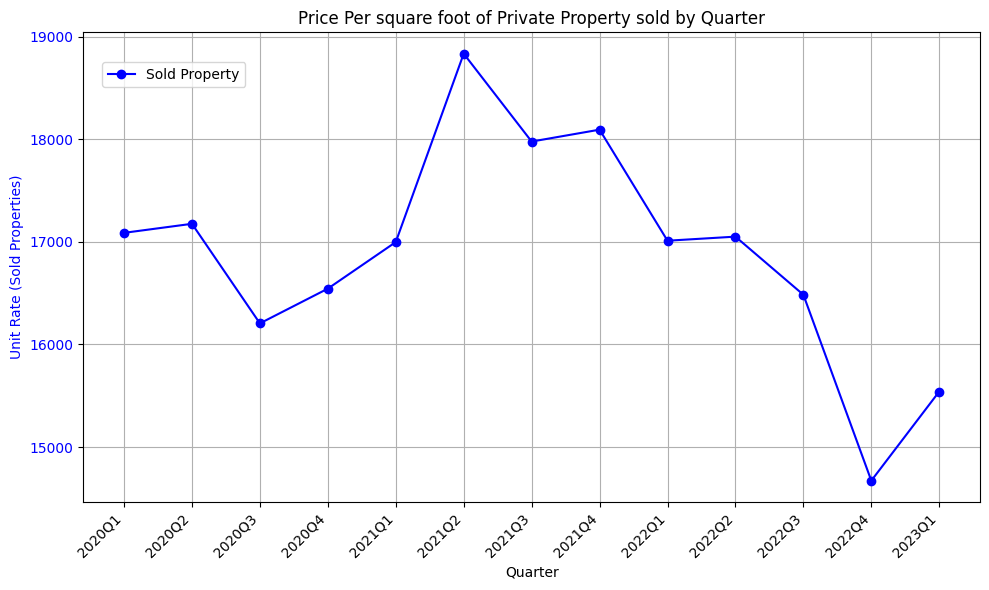

In [ ]:
# Look at Price Per Sq. Feet. Movement of Private Property sold and rented by Quarter
# Plotting with secondary Y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sold properties on primary Y-axis
ax1.plot(sold_monthly.index.astype(str), sold_monthly.values, label='Sold Property', marker='o', color='b')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Unit Rate (Sold Properties)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Rotate x-axis labels and adjust spacing
plt.xticks(rotation=45, ha='right')  # Rotate the labels by 45 degrees and align them to the right
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to provide space for x-axis labels

# Adding title and legend
plt.title('Price Per square foot of Private Property sold by Quarter')
plt.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.grid(True)
plt.show()

#DATA ANALYSIS OF HONG KONG PROPERTY MARKET


# Properties sold per quarter


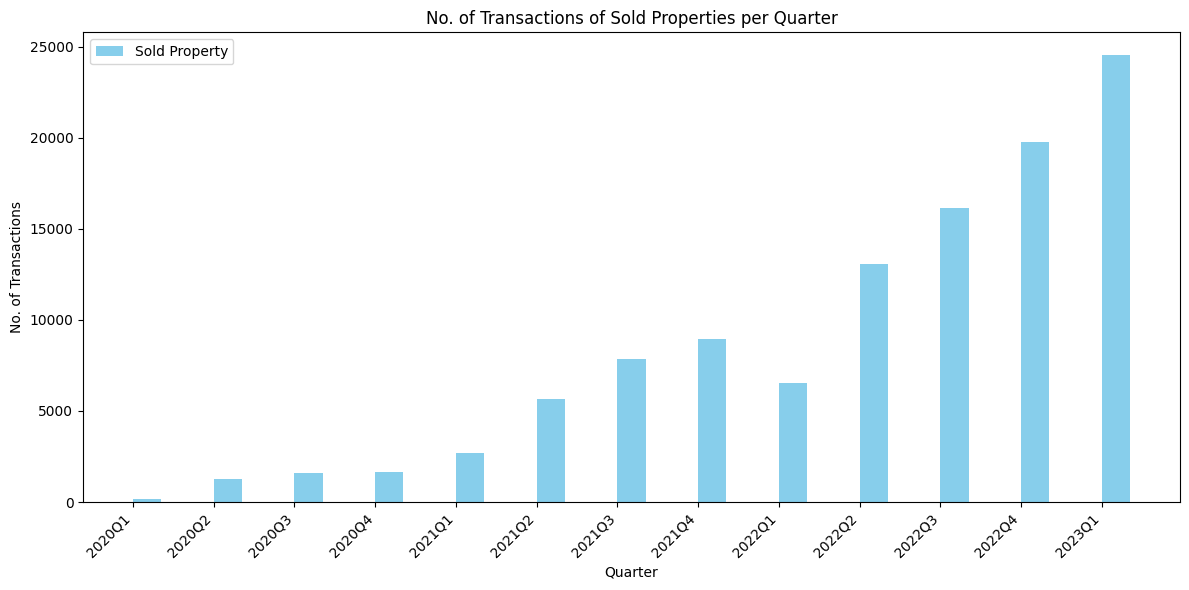

In [ ]:
# Look at No. of Transactions of Sold Properties per Quarter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group by YearQuarter and count transactions
sold_count = private_sold.groupby('YearQuarter').size()

# Combine the counts into a single DataFrame
transaction_counts = pd.DataFrame({
    'Sold': sold_count
}).fillna(0)

# Plotting the non-stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Define the positions of the bars
index = np.arange(len(transaction_counts))

# Plot the bars
bar2 = ax.bar(index + bar_width, transaction_counts['Sold'], bar_width, label='Sold Property', color='skyblue')

# Adding labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('No. of Transactions')
ax.set_title('No. of Transactions of Sold Properties per Quarter')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(transaction_counts.index.astype(str), rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

#Distribution of Sold Private Properties

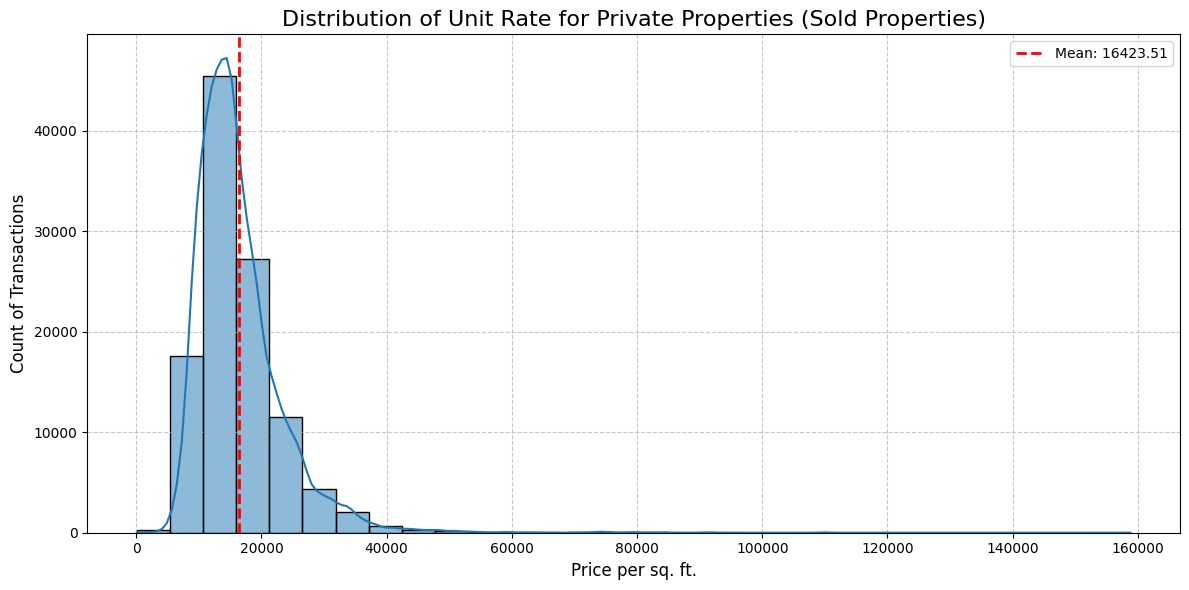

In [ ]:
# Look at Distribution of Unit Rate for Private Properties (Sold Properties)
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=private_sold, x='unit_rate', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Unit Rate for Private Properties (Sold Properties)', fontsize=16)
plt.xlabel('Price per sq. ft.', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a vertical line for the mean unit rate
mean_unit_rate = private_sold['unit_rate'].mean()
plt.axvline(mean_unit_rate, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_unit_rate:.2f}')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-41-727ea2b7f720>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(index[i], unit_rates_summary['Sold Mean'][i] + 0.01, f'{unit_rates_summary["Sold Mean"][i]:.2f}', ha='center', va='bottom')


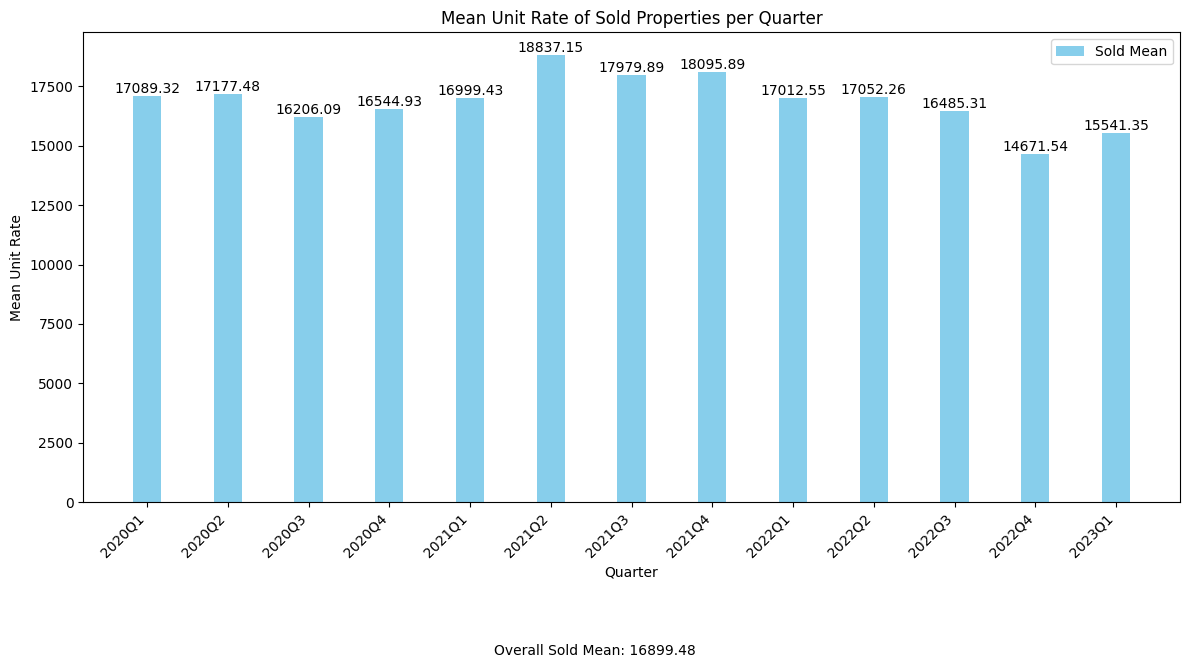

In [ ]:
# Look at Mean Unit Rate of Rental Properties per Quarter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group by YearQuarter and calculate mean of unit rates
sold_mean = private_sold.groupby('YearQuarter')['unit_rate'].mean()

# Create a DataFrame for the mean unit rates
unit_rates_summary = pd.DataFrame({
    'Sold Mean': sold_mean
}).fillna(0)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Define the positions of the bars
index = np.arange(len(unit_rates_summary))

# Plot the bars
bar1 = ax.bar(index, unit_rates_summary['Sold Mean'], bar_width, label='Sold Mean', color='skyblue')

# Adding labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Mean Unit Rate')
ax.set_title('Mean Unit Rate of Sold Properties per Quarter')
ax.set_xticks(index)
ax.set_xticklabels(unit_rates_summary.index.astype(str), rotation=45, ha='right')
ax.legend()

# Display mean values as numbers on the bars
for i in range(len(index)):
    ax.text(index[i], unit_rates_summary['Sold Mean'][i] + 0.01, f'{unit_rates_summary["Sold Mean"][i]:.2f}', ha='center', va='bottom')

# Overall average
sold_overall_mean = sold_mean.mean()

# Display overall averages below the graph
plt.figtext(0.5, -0.1, f"Overall Sold Mean: {sold_overall_mean:.2f}", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


Price Distribution of Private Rental Properties

Mean unit rate at 39.37 HKD for rental
Most transactions occur between approximately 15,000 and 20,000 per square foot. Average sales is 16,899 per square foot for sales
Bell Shaped, Moderate Spread

# Properies sold by size

<Figure size 2000x1000 with 0 Axes>

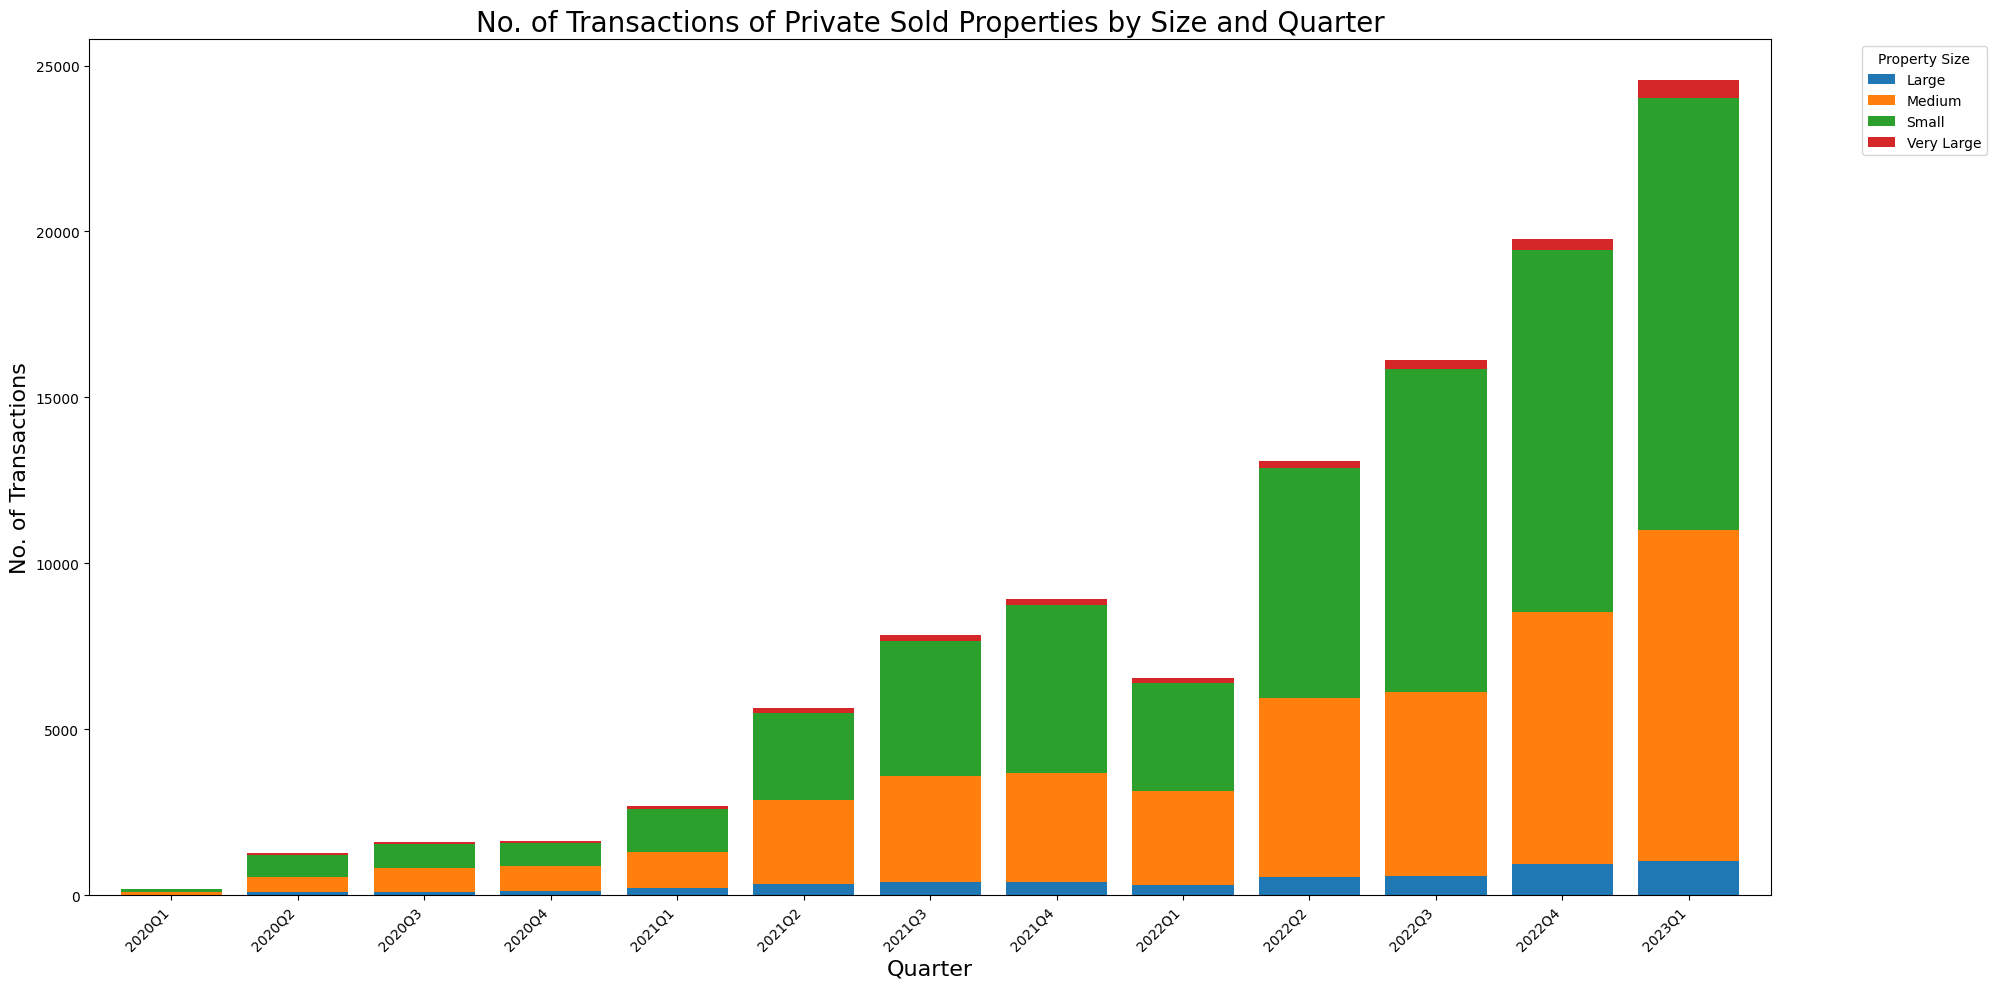

In [ ]:
# Look at No. of Transactions of Private Sold Properties by Size and Quarter
import pandas as pd
import matplotlib.pyplot as plt

# Group by month and size category, then count transactions
transaction_counts = private_sold.groupby(['YearQuarter', 'property_size']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(20, 10))  # Increased figure width
ax = transaction_counts.plot(kind='bar', stacked=True, figsize=(20, 10), width=0.8)  # Increased bar width

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by Size and Quarter', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('No. of Transactions', fontsize=16)
plt.legend(title='Property Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

# Consider size and unit rate

<ipython-input-43-cc5ea1cac5b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='unit_rate', y='property_size', data=private_sold, palette='Set2', hue=None, dodge=False)


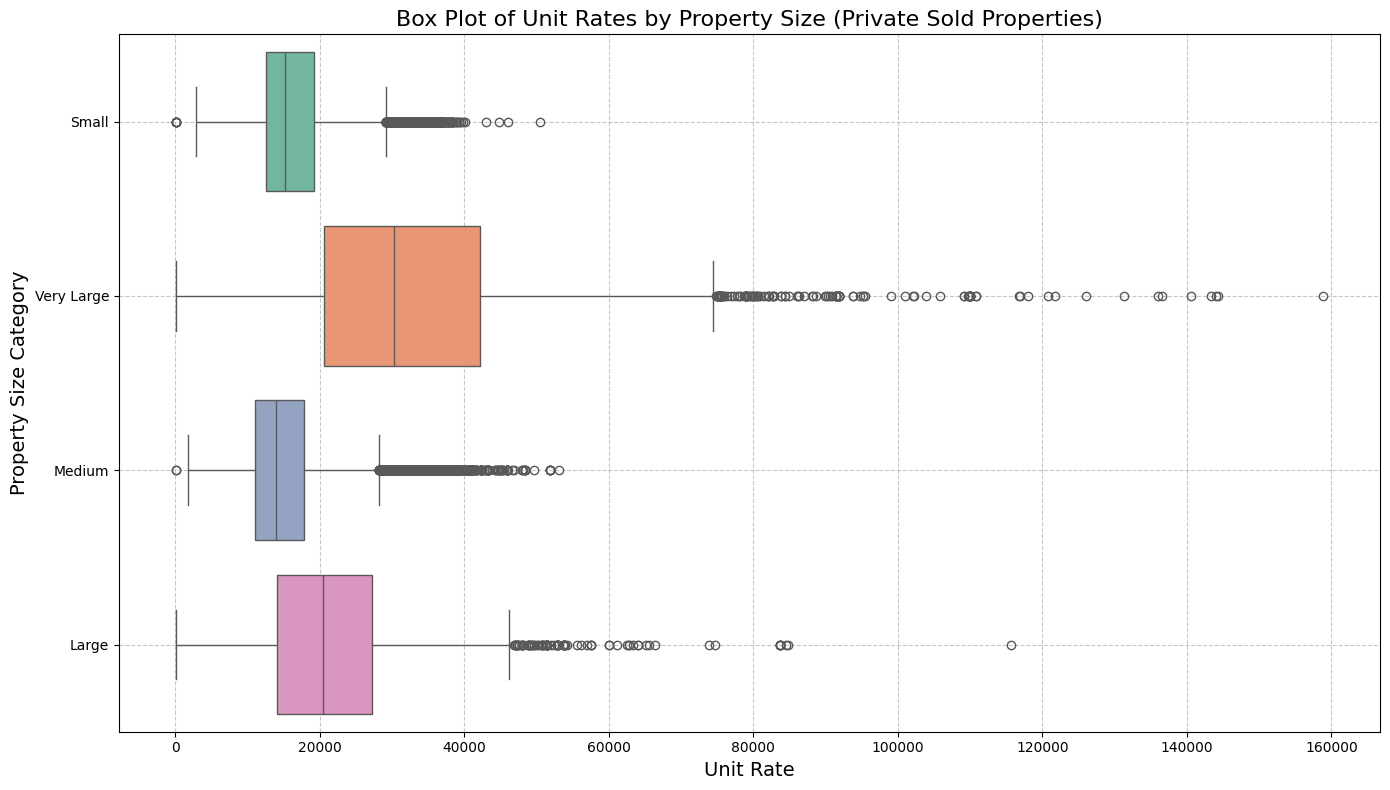

In [ ]:
# Plotting the box plot with updated syntax for future compatibility
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.boxplot(x='unit_rate', y='property_size', data=private_sold, palette='Set2', hue=None, dodge=False)

# Customizing the plot
plt.title('Box Plot of Unit Rates by Property Size (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=14)
plt.ylabel('Property Size Category', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

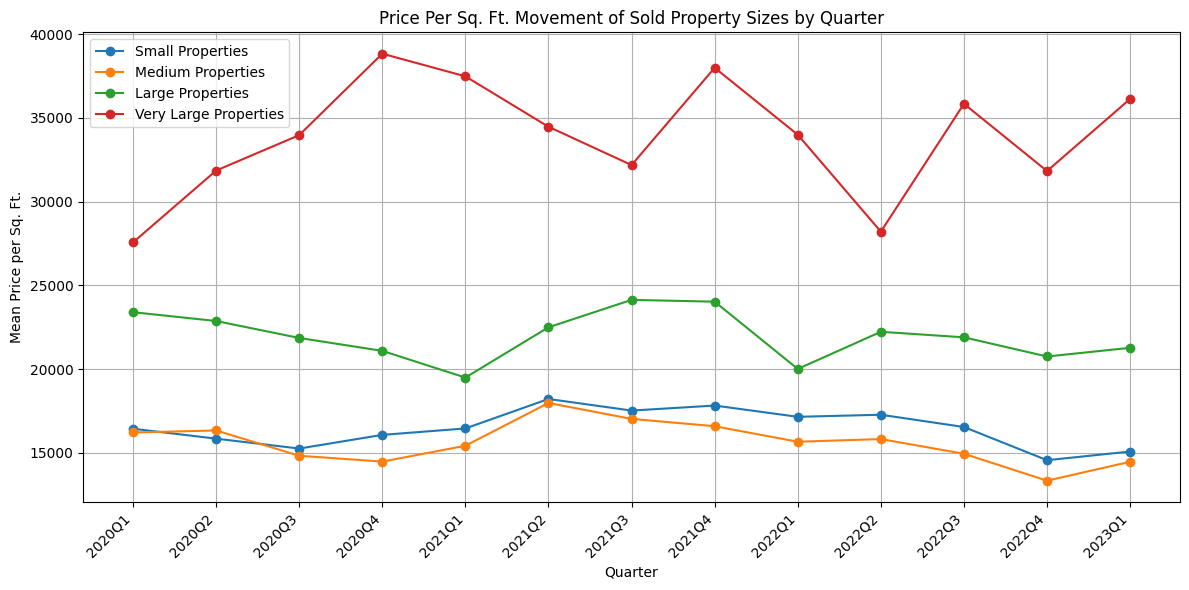

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by YearQuarter and property size, then calculate the mean unit rate
private_sold_rate_by_size = private_sold.groupby(['YearQuarter', 'property_size'])['unit_rate'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Small'], label='Small Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Medium'], label='Medium Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Large'], label='Large Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Very Large'], label='Very Large Properties', marker='o')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Mean Price per Sq. Ft.')
plt.title('Price Per Sq. Ft. Movement of Sold Property Sizes by Quarter')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

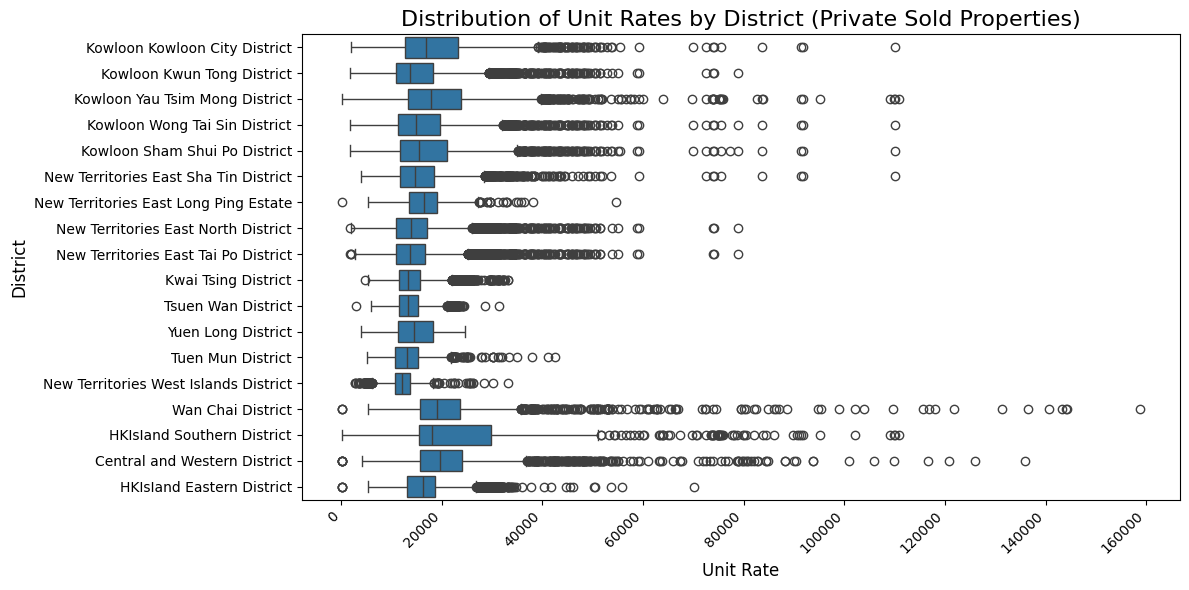

In [ ]:
# Looks at the Distribution of Unit Rates by District
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting box plot for private sold properties
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='district', data=private_sold)

# Customize the plot
plt.title('Distribution of Unit Rates by District (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-46-bf00b0fc3ffe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='unit_rate', y='region', data=merged_dataset, palette='Set2')


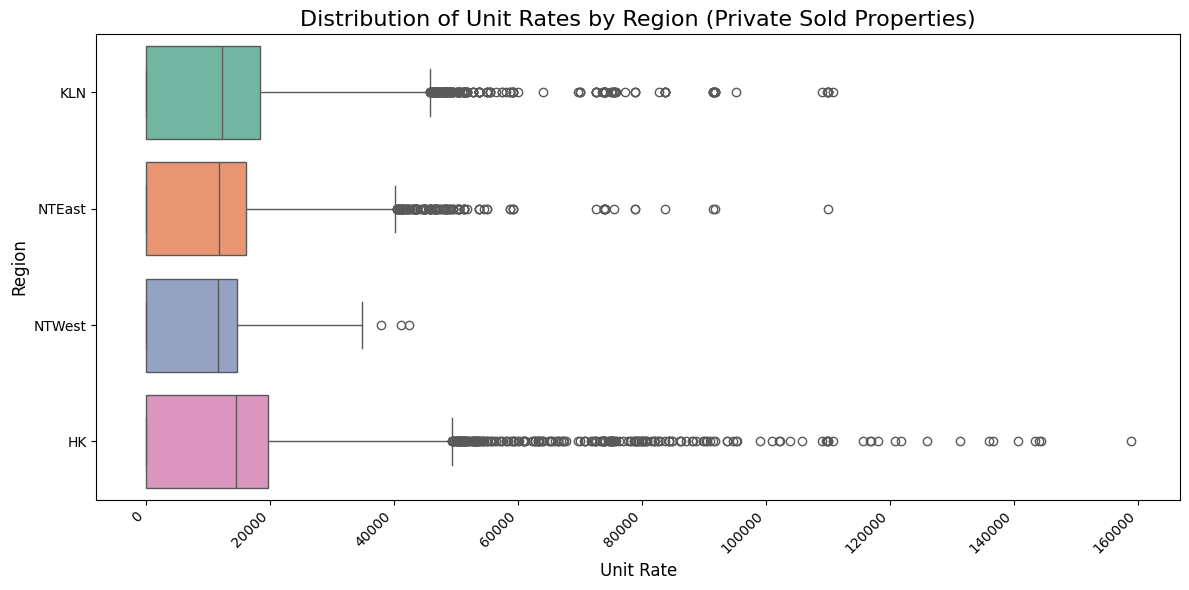

In [ ]:
# Looks at the Distribution of Unit Rates by Region
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the region mapping is already done as shown in your screenshot
# Plotting box plot for private sold properties by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='region', data=merged_dataset, palette='Set2')

# Customize the plot
plt.title('Distribution of Unit Rates by Region (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Looking at the data in districts and for each yearly quarter

<Figure size 1200x600 with 0 Axes>

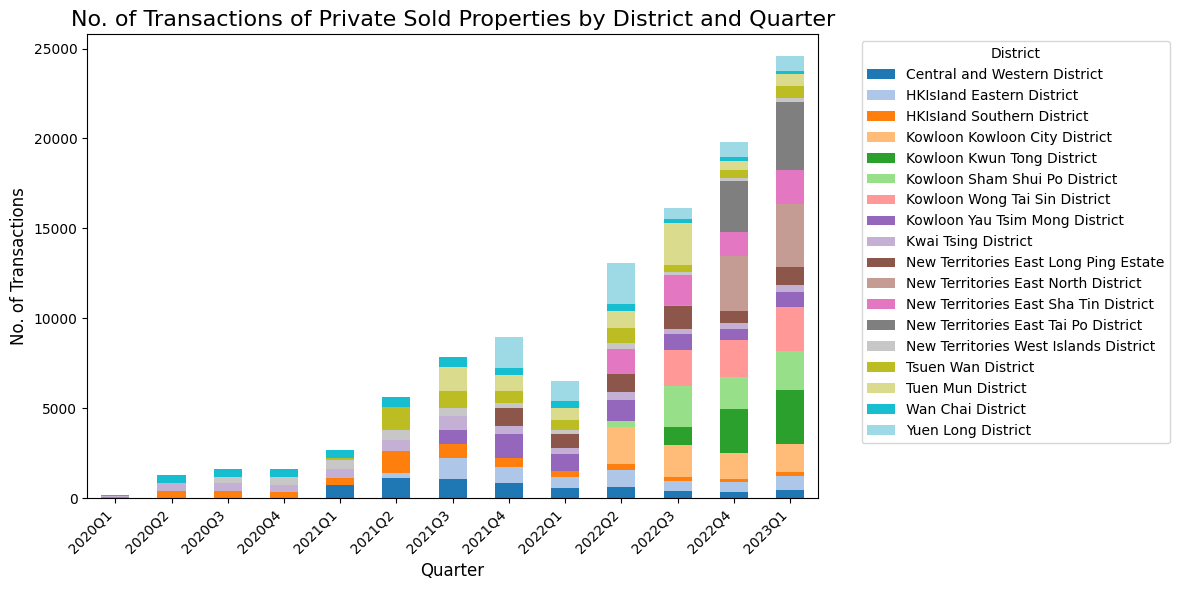

In [ ]:
# Looks at No. of Transactions of Private Sold Properties by District and Quarter
import pandas as pd
import matplotlib.pyplot as plt

# Group by YearQuarter and district, then count transactions
tcount_sold_by_district = private_sold.groupby(['YearQuarter', 'district']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
tcount_sold_by_district.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by District and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Looking at missing data in district

In [ ]:
# Look at the sales in each quarter to see what is missing

# Group by district and YearQuarter, calculating number of sales and average price
summary = merged_dataset.groupby(['district', 'YearQuarter']).agg(
    Sales_Count=('new_price', 'count'),  # Count of sales
    Total_Price=('new_price', 'sum')     # Sum of prices
).reset_index()

# Calculate Average Price per YearQuarter
summary['Average_Price'] = summary['Total_Price'] / summary['Sales_Count']

# Convert Average_Price to HK$ million
summary['Average_Price'] = summary['Average_Price'] / 1_000_000

# Create a complete list of all districts and YearQuarters
all_districts = summary['district'].unique()
all_yearquarters = summary['YearQuarter'].unique()

# Create a full grid of all combinations
full_index = pd.MultiIndex.from_product([all_districts, all_yearquarters], names=['district', 'YearQuarter'])
full_summary = pd.DataFrame(index=full_index).reset_index()

# Merge with the summary to fill in "no data" where applicable
final_table = pd.merge(full_summary, summary, on=['district', 'YearQuarter'], how='left')

# Fill NaN values with "no data"
final_table['Sales_Count'].fillna("no data", inplace=True)
final_table['Average_Price'].fillna("no data", inplace=True)

# Sort by YearQuarter and district
final_table.sort_values(by=['YearQuarter', 'district'], inplace=True)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the full summary table
print(final_table[['district', 'YearQuarter', 'Average_Price', 'Sales_Count']])

                                  district YearQuarter Average_Price  \
9             Central and Western District      2020Q1       no data   
22               HKIsIand Eastern District      2020Q1       no data   
35              HKIsIand Southern District      2020Q1     11.568427   
48           Kowloon Kowloon City District      2020Q1       no data   
61              Kowloon Kwun Tong District      2020Q1       no data   
74           Kowloon Sham Shui Po District      2020Q1       no data   
87           Kowloon Wong Tai Sin District      2020Q1       no data   
100         Kowloon Yau Tsim Mong District      2020Q1       no data   
113                    Kwai Tsing District      2020Q1      4.665317   
126  New Territories East Long Ping Estate      2020Q1       no data   
139    New Territories East North District      2020Q1       no data   
152  New Territories East Sha Tin District      2020Q1       no data   
165   New Territories East Tai Po District      2020Q1       no 

<ipython-input-48-2c3392c06f94>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_table['Sales_Count'].fillna("no data", inplace=True)
<ipython-input-48-2c3392c06f94>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final_table['Average_Price'].fillna("no data", inplace=True)


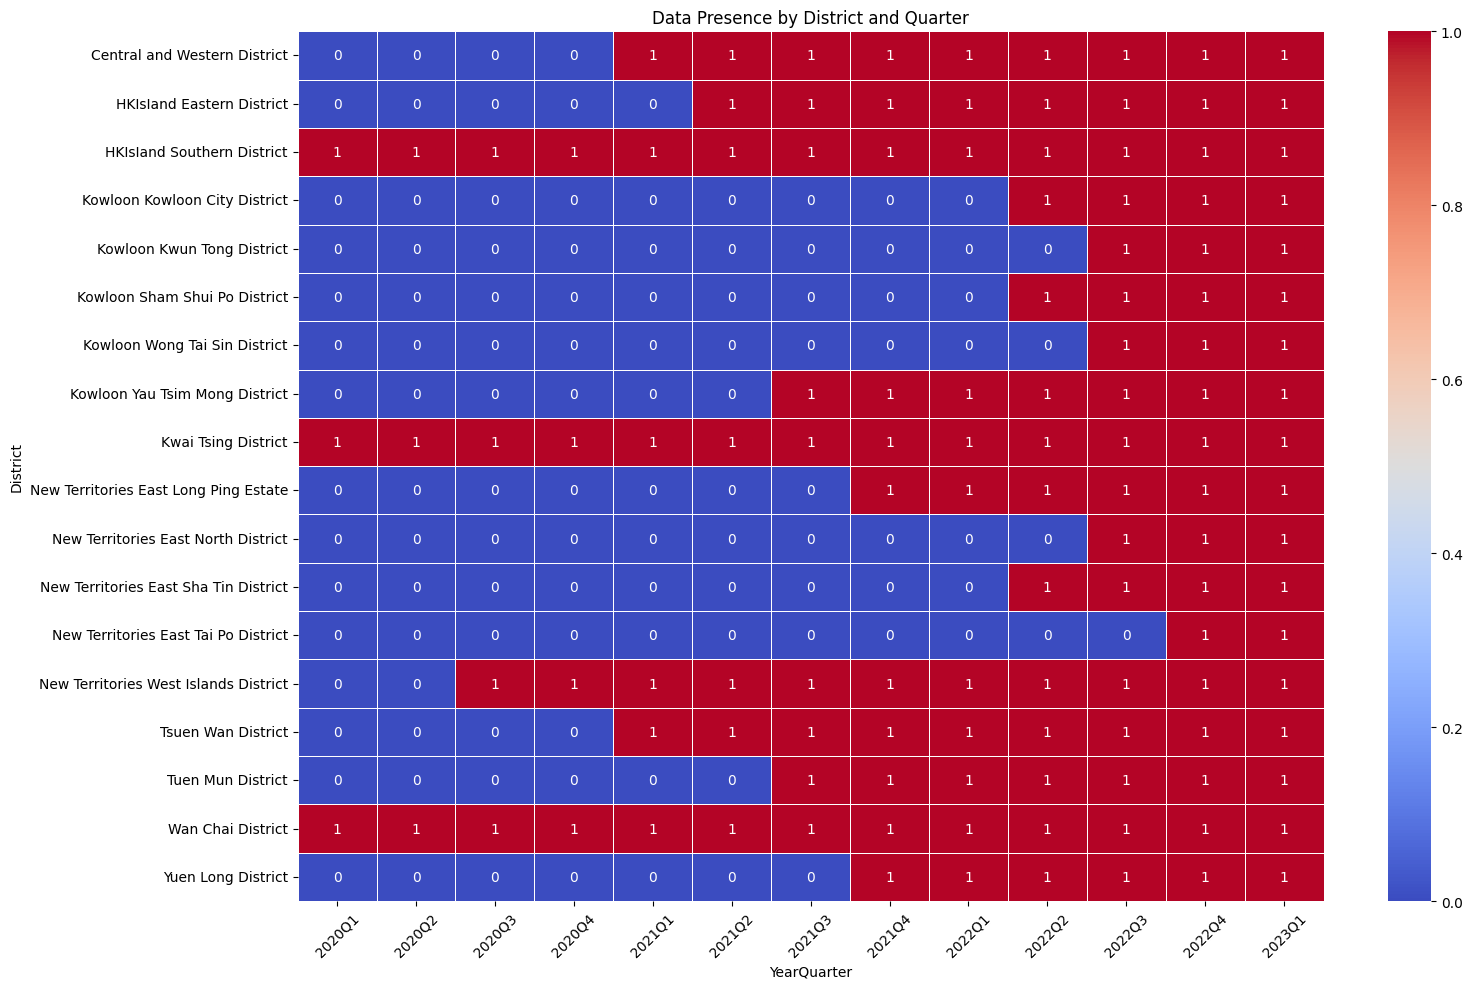

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# First, replace "no data" with NaN for easier manipulation
final_table['Sales_Count'] = final_table['Sales_Count'].replace("no data", pd.NA)

# Create a matrix to show where data is missing
missing_data_matrix = final_table.pivot(index='district', columns='YearQuarter', values='Sales_Count')

# Convert the missing data to a binary format: 1 for data present, 0 for missing
missing_data_matrix = missing_data_matrix.notna().astype(int)  # 1 for data present, 0 for data missing

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(missing_data_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Data Presence by District and Quarter')
plt.xlabel('YearQuarter')
plt.ylabel('District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

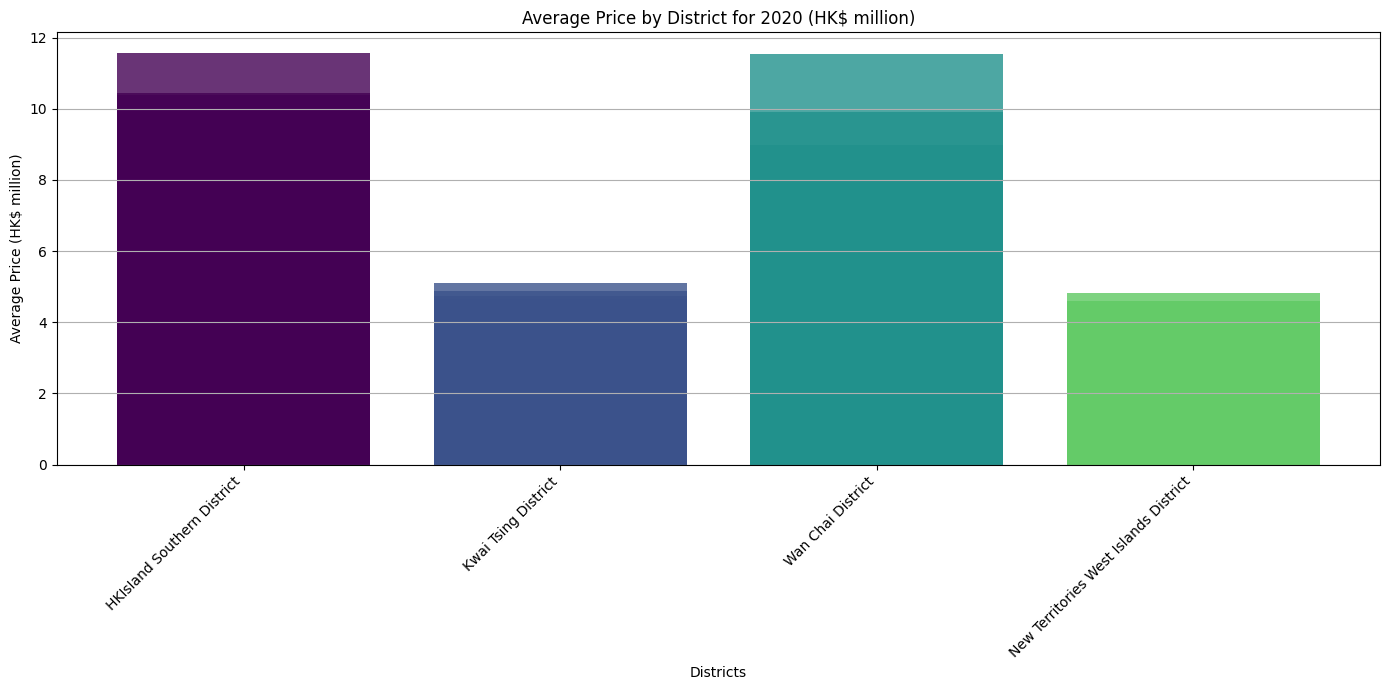

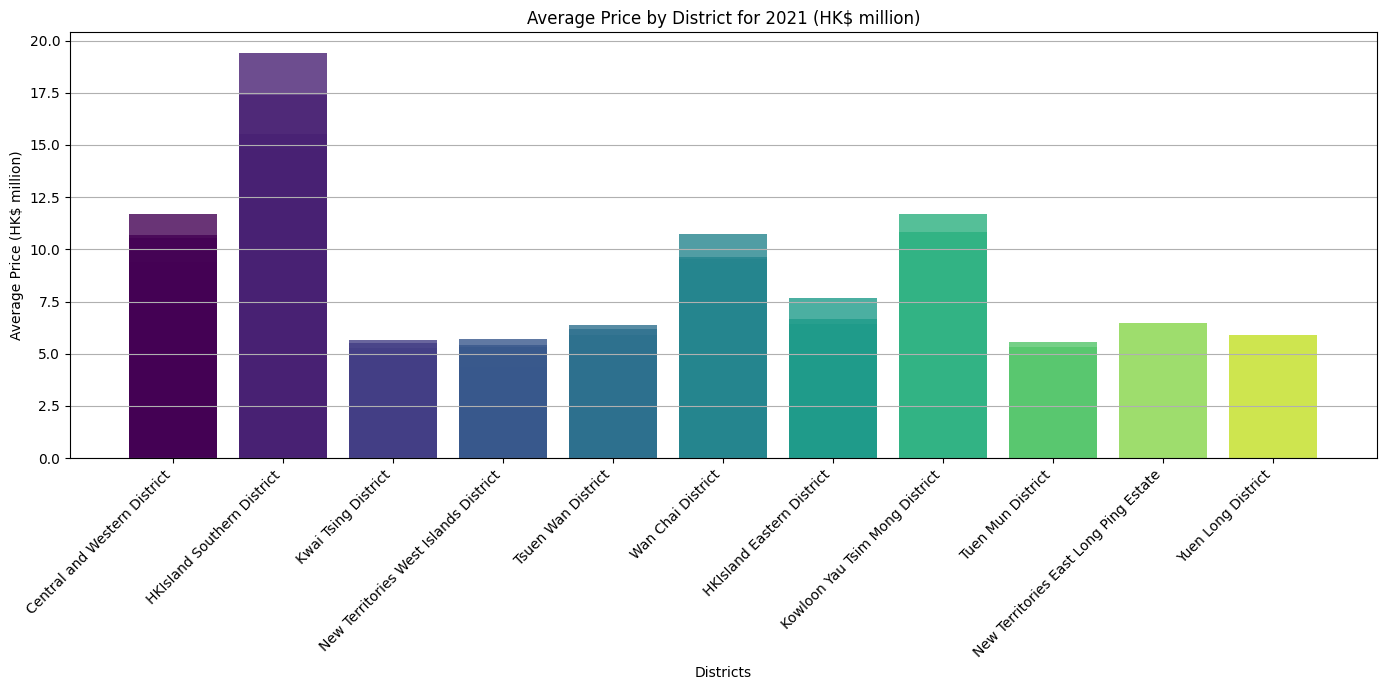

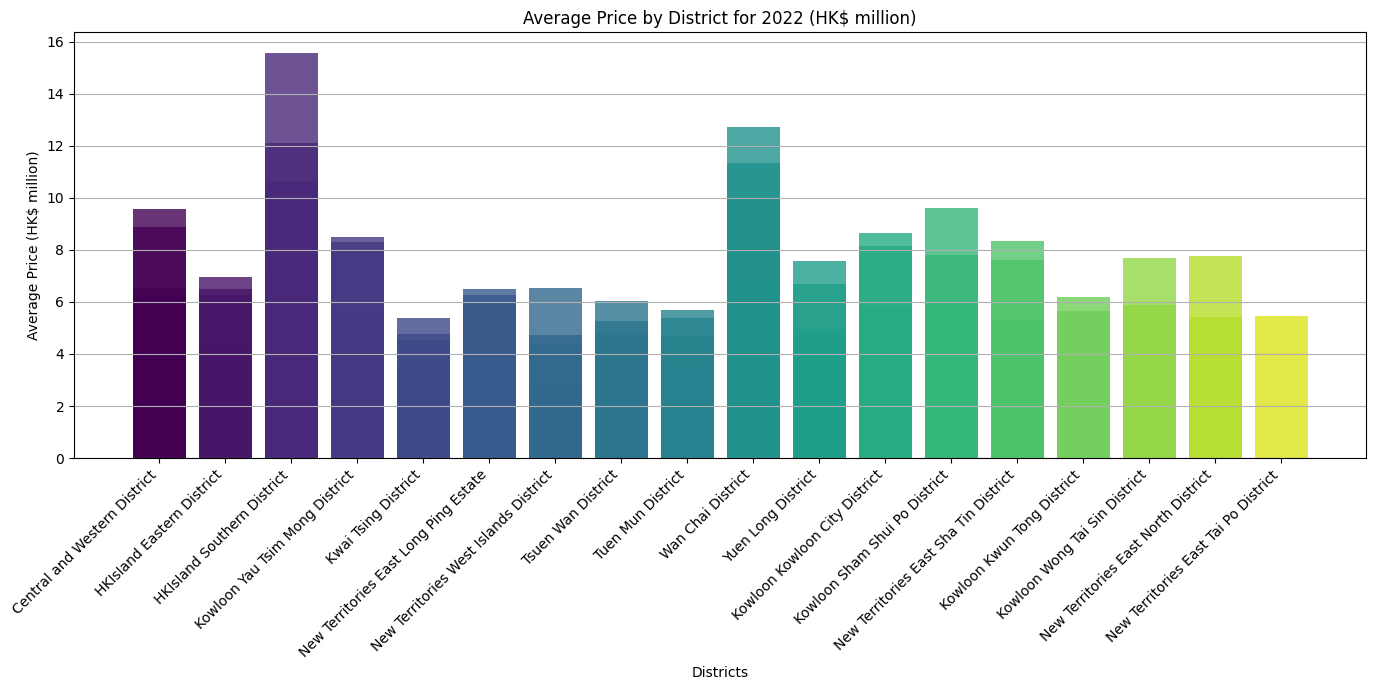

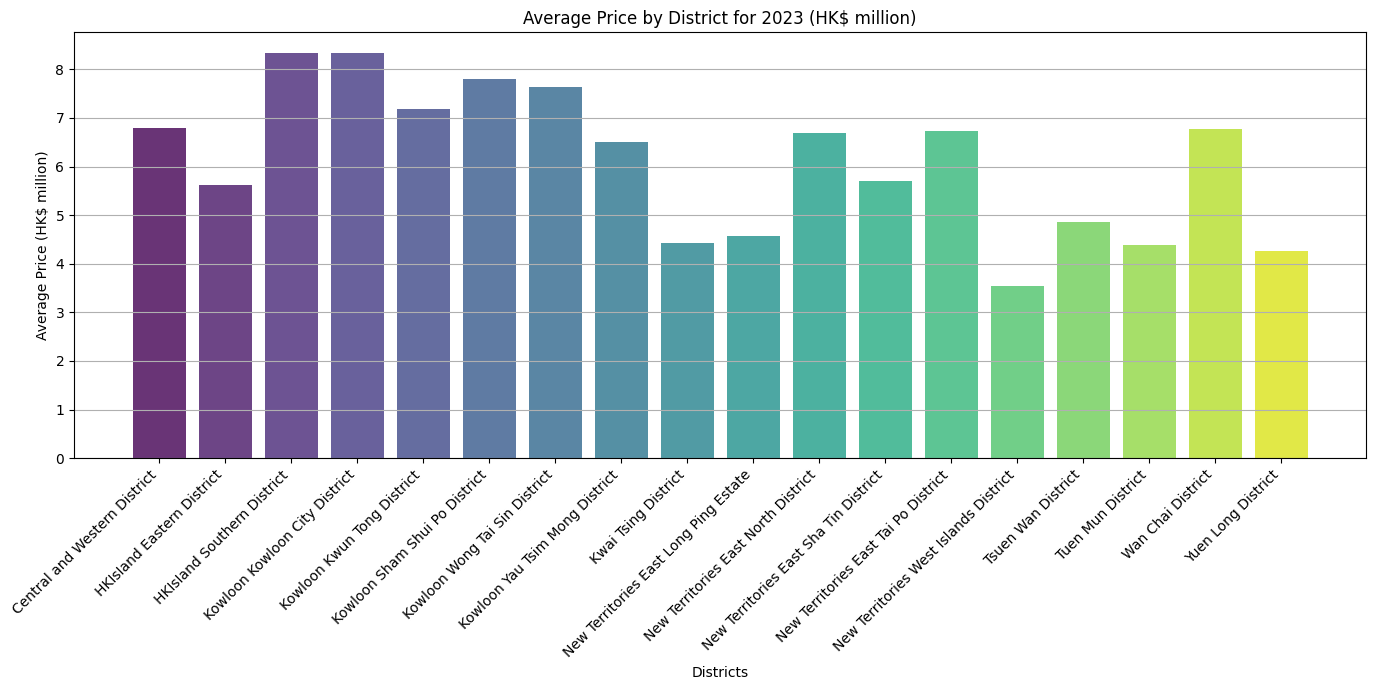

                                  district YearQuarter  Average_Price  \
35              HKIsIand Southern District      2020Q1      11.568427   
113                    Kwai Tsing District      2020Q1       4.665317   
217                      Wan Chai District      2020Q1       7.902904   
36              HKIsIand Southern District      2020Q2      10.017431   
114                    Kwai Tsing District      2020Q2       4.733592   
218                      Wan Chai District      2020Q2       8.993041   
37              HKIsIand Southern District      2020Q3      10.439390   
115                    Kwai Tsing District      2020Q3       4.880228   
180  New Territories West Islands District      2020Q3       4.586189   
219                      Wan Chai District      2020Q3       9.916037   
38              HKIsIand Southern District      2020Q4      10.392845   
116                    Kwai Tsing District      2020Q4       5.101222   
181  New Territories West Islands District      202

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out rows where Average Price is "no data"
plot_data = final_table[final_table['Average_Price'] != "no data"].copy()

# Convert Average_Price to float for plotting
plot_data['Average_Price'] = plot_data['Average_Price'].astype(float)

# Extract Year from YearQuarter as string for plotting
plot_data['Year'] = plot_data['YearQuarter'].astype(str).str[:4]  # Get the first 4 characters for the year

# Create a plot for each year
years = plot_data['Year'].unique()

# Use a colormap for unique colors
color_map = plt.cm.viridis

for year in years:
    plt.figure(figsize=(14, 7))

    # Filter data for the current year
    year_data = plot_data[plot_data['Year'] == year]

    # Assign unique colors to each district
    colors = [color_map(i / len(year_data['district'].unique())) for i in range(len(year_data['district'].unique()))]
    district_color_map = {district: colors[i] for i, district in enumerate(year_data['district'].unique())}

    # Plotting with unique colors
    plt.bar(year_data['district'], year_data['Average_Price'],
            color=[district_color_map[district] for district in year_data['district']], alpha=0.8)

    # Adding labels and title
    plt.title(f'Average Price by District for {year} (HK$ million)')
    plt.xlabel('Districts')
    plt.ylabel('Average Price (HK$ million)')
    plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
    plt.grid(axis='y')

    # Show the plot for the current year
    plt.tight_layout()
    plt.show()

# Optionally, display the summary table
print(plot_data[['district', 'YearQuarter', 'Average_Price', 'Sales_Count']])

# One hot encode districts for later analysis

In [ ]:
# Look at the types of districts in the database
merged_dataset['district'].unique()

array(['Kowloon Kowloon City District', 'Kowloon Kwun Tong District',
       'Kowloon Yau Tsim Mong District', 'Kowloon Wong Tai Sin District',
       'Kowloon Sham Shui Po District',
       'New Territories East Sha Tin District',
       'New Territories East Long Ping Estate',
       'New Territories East North District',
       'New Territories East Tai Po District', 'Kwai Tsing District',
       'Tsuen Wan District', 'Yuen Long District', 'Tuen Mun District',
       'New Territories West Islands District', 'Wan Chai District',
       'HKIsIand Southern District', 'Central and Western District',
       'HKIsIand Eastern District'], dtype=object)

In [ ]:
# District (location) will be important in determining property prices
# One Hot encode the districts so they can be used for further analysis
one_hot_encoded = pd.get_dummies(merged_dataset['district'], prefix='district')
unique_districts = merged_dataset['district'].unique()
label_mapping = {district: i+1 for i, district in enumerate(unique_districts)}
merged_dataset['district_encoded'] = merged_dataset['district'].map(label_mapping)

In [ ]:
merged_dataset['district_encoded'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [ ]:
#sanity check
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158122 entries, 0 to 159675
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           158122 non-null  int64  
 1   date                 158122 non-null  object 
 2   address              158122 non-null  object 
 3   changes              158122 non-null  object 
 4   saleable_area(ft^2)  158122 non-null  int64  
 5   unit_rate            158122 non-null  int64  
 6   district             158122 non-null  object 
 7   Tower                60395 non-null   object 
 8   Flat                 150707 non-null  object 
 9   Phase                48336 non-null   object 
 10  Block                53620 non-null   object 
 11  Rental               158122 non-null  bool   
 12  Public Housing       158122 non-null  bool   
 13  floor                158122 non-null  float64
 14  YearQuarter          158122 non-null  object 
 15  CG                   1

# Getting ready for ML

In [ ]:
# Consider dropping remaining object columns before analysis

# Check columns names
# Get column names as a list
column_names = merged_dataset.columns.tolist()
print(column_names)

['Unnamed: 0', 'date', 'address', 'changes', 'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat', 'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'YearQuarter', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR', 'property_size', 'region', 'new_price', 'district_encoded']


# Checking for outlyers in the merged dataset

In [ ]:
import pandas as pd

# Assuming merged_dataset is a pandas DataFrame

def detect_outliers_iqr(merged_dataset):
    outliers = pd.DataFrame()
    for col in merged_dataset.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = merged_dataset[col].quantile(0.25)
        Q3 = merged_dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = ((merged_dataset[col] < lower_bound) | (merged_dataset[col] > upper_bound))
    return outliers

def handle_outliers(merged_dataset):
    outliers = detect_outliers_iqr(merged_dataset)
    for col in outliers.columns:
        merged_dataset.loc[outliers[col], col] = merged_dataset[col].median()
    return merged_dataset

# Detecting outliers
outliers = detect_outliers_iqr(merged_dataset)

# Handling outliers
cleaned_dataset = handle_outliers(merged_dataset)

print("Outliers detected and handled.")

Outliers detected and handled.


<ipython-input-56-e501ab0b3c6e>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '84661.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_dataset.loc[outliers[col], col] = merged_dataset[col].median()
<ipython-input-56-e501ab0b3c6e>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5319819.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_dataset.loc[outliers[col], col] = merged_dataset[col].median()


# Normalise the variables for further ML analysis

In [ ]:
# Need to normalise the macro values
from sklearn.preprocessing import MinMaxScaler

# List of columns to normalize
columns_to_normalize = ['saleable_area(ft^2)','unit_rate', 'new_price','CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'SD', 'SM','UR', 'floor']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
merged_dataset[columns_to_normalize] = scaler.fit_transform(merged_dataset[columns_to_normalize])

# Display the first few rows of the normalized dataset
print(merged_dataset.head())

   Unnamed: 0      date                                        address  \
0         0.0  09-03-23  The Long Beach, Tower 7, Middle Floor, Flat D   
1         1.0  09-03-23  One Kai Tak, II, Tower 3, Upper Floor, Flat H   
2         2.0  08-03-23        Sky Tower, Block 1, Lower Floor, Flat B   
3         3.0  08-03-23    Hampton Place, Tower 2, Upper Floor, Flat F   
4         4.0  08-03-23                  Skypark, Upper Floor, Flat A5   

  changes  saleable_area(ft^2)  unit_rate                       district  \
0      --             0.736570   0.000803  Kowloon Kowloon City District   
1      --             0.280992   0.000851  Kowloon Kowloon City District   
2      --             0.430785   0.000709  Kowloon Kowloon City District   
3      --             0.336777   0.000803  Kowloon Kowloon City District   
4      --             0.314050   0.000898  Kowloon Kowloon City District   

  Tower Flat Phase  ...        PG     PI   SD        SM     SOLD   UR  \
0     7    D   NaN  ...  

# Considering which variables have the greatest correlation with Price Increase.

The project is about predicting the price increases of property in Hong Kong; however I will "first" look at three target factors which are saleable area which is the cost of the square foot of the flat, the price of the flat as well as the price increase for PI.

I expect that the price of the flat will be governed by the area/size of the flat and it geographic location. I expect that the price increase will be governed by the macro economic indicators.

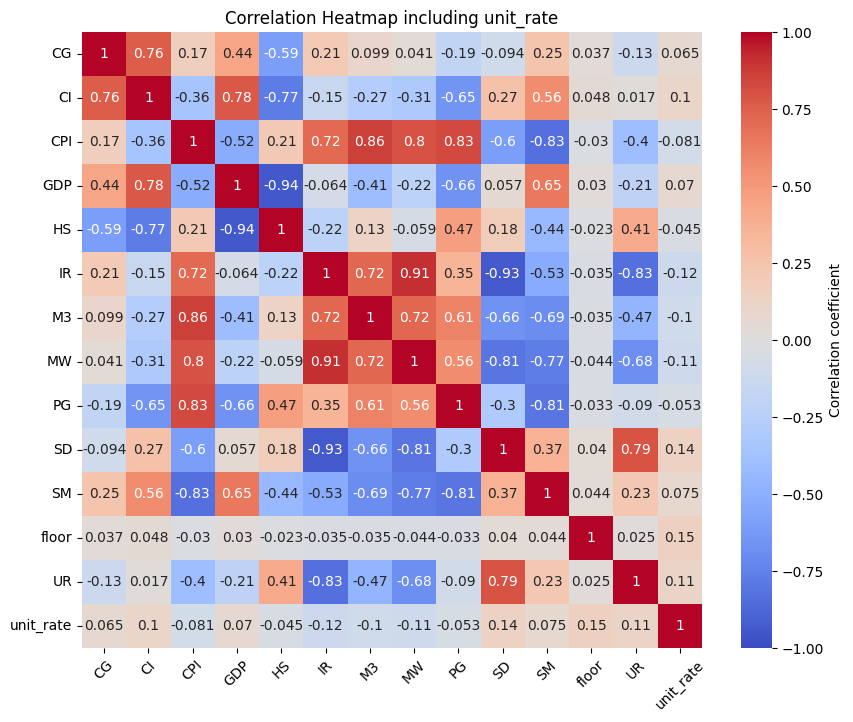

Correlation values with unit_rate:
CG       0.064732
CI       0.101700
CPI     -0.081303
GDP      0.069605
HS      -0.045089
IR      -0.122355
M3      -0.100484
MW      -0.105375
PG      -0.053036
SD       0.140711
SM       0.075050
floor    0.154265
UR       0.110949
Name: unit_rate, dtype: float64



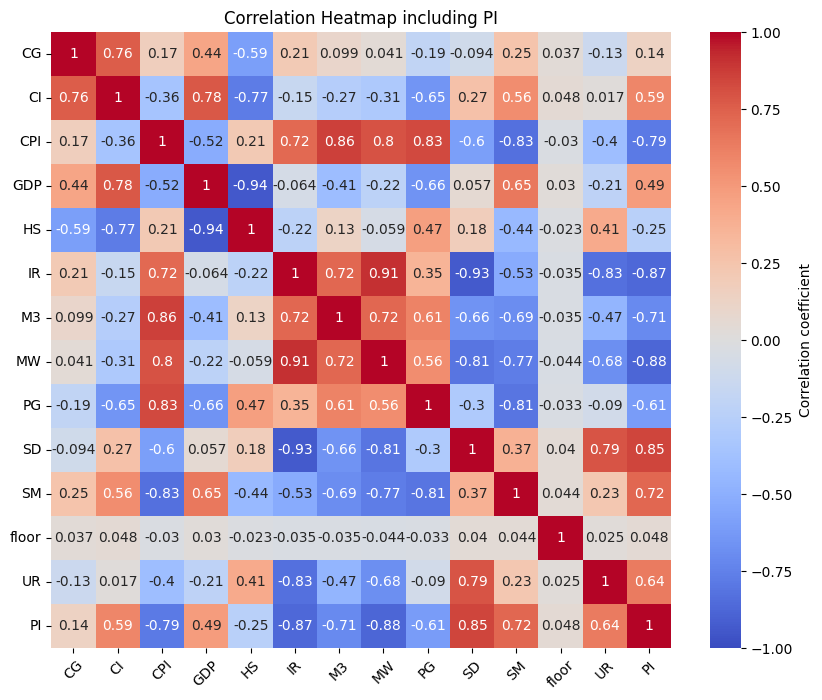

Correlation values with PI:
CG       0.139666
CI       0.592223
CPI     -0.787308
GDP      0.489806
HS      -0.249815
IR      -0.872452
M3      -0.709390
MW      -0.881032
PG      -0.613532
SD       0.845135
SM       0.722114
floor    0.048027
UR       0.636860
Name: PI, dtype: float64



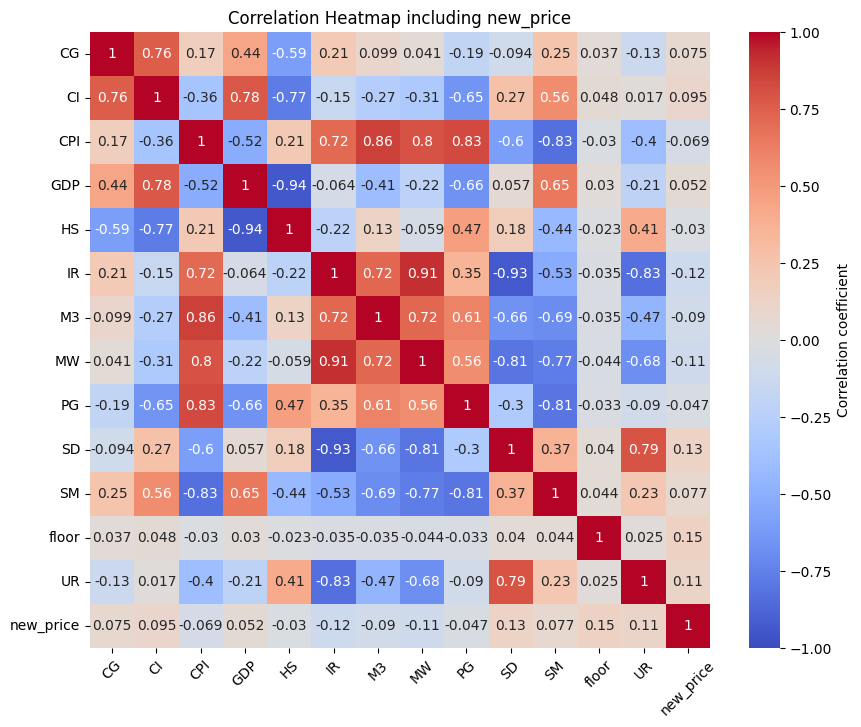

Correlation values with new_price:
CG       0.074880
CI       0.094610
CPI     -0.069125
GDP      0.051756
HS      -0.030434
IR      -0.115418
M3      -0.089926
MW      -0.105490
PG      -0.046603
SD       0.127522
SM       0.076644
floor    0.146431
UR       0.111717
Name: new_price, dtype: float64

       unit_rate        PI  new_price
CG      0.064732  0.139666   0.074880
CI      0.101700  0.592223   0.094610
CPI    -0.081303 -0.787308  -0.069125
GDP     0.069605  0.489806   0.051756
HS     -0.045089 -0.249815  -0.030434
IR     -0.122355 -0.872452  -0.115418
M3     -0.100484 -0.709390  -0.089926
MW     -0.105375 -0.881032  -0.105490
PG     -0.053036 -0.613532  -0.046603
SD      0.140711  0.845135   0.127522
SM      0.075050  0.722114   0.076644
floor   0.154265  0.048027   0.146431
UR      0.110949  0.636860   0.111717


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to consider for correlation
columns_to_consider = ['CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'SD', 'SM', 'floor', 'UR']

# List of target columns
targets = ['unit_rate', 'PI', 'new_price']

# Drop rows where the index is 'district', 'YearQuarter', or 'Quarter'
rows_to_drop = ['district', 'YearQuarter', 'Quarter']
filtered_dataset = merged_dataset[~merged_dataset.index.isin(rows_to_drop)]

# Loop through each target and calculate correlation, then create a heatmap
for target in targets:
    # Calculate correlation
    correlation = filtered_dataset[columns_to_consider + [target]].corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation coefficient'})
    plt.title(f'Correlation Heatmap including {target}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # Extract and display the correlation values for the target
    target_correlation = correlation[target].drop(target)
    print(f"Correlation values with {target}:\n{target_correlation}\n")

# Display the correlation table for all specified columns and targets
correlation_table = filtered_dataset[columns_to_consider + targets].corr().loc[columns_to_consider, targets]
print(correlation_table)

# District Price Analysis (Area Analysis)

My research indicates that an important factor governing the price of a flats in Hong Kong is its location or geographical area. Therefore, I have reviewed costs of flat in each area (or district) as well as the costs increases the area.

My research indicates that the price of a flat in Hong Kong is also governed by its location for geographical area. Therefore, I have reviewed costs of flat in each area as well as the costs increases the area.

The purpose of this is to look at which areas in Hong Kong would be best to purchase flats in the future.

In [ ]:
# Clean the data by removing rows with NaN values in the 'unit_rate' column
cleaned_dataset = merged_dataset.dropna(subset=['unit_rate'])  # Drop rows where 'unit_rate' is NaN

# Calculate the mean unit_rate for each district
# Group by 'district_encoded' and 'district' and calculate the mean 'unit_rate'
average_unit_rate = cleaned_dataset.groupby(['district_encoded', 'district']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate = average_unit_rate.rename(columns={'unit_rate': 'average_unit_rate'})

# Create a DataFrame with all district codes and descriptions
all_districts = merged_dataset[['district_encoded', 'district']].drop_duplicates().reset_index(drop=True)

# Merge the average unit rate with all districts to ensure all districts are included
final_table = pd.merge(all_districts, average_unit_rate, on=['district_encoded', 'district'], how='left')

# Fill NaN values in 'average_unit_rate' with a placeholder value (e.g., 0 or 'N/A')
final_table['average_unit_rate'] = final_table['average_unit_rate'].fillna('N/A')

# Step 3: Display the final table
print("Table of Districts with One-Hot Encoding, District, and Average Unit Rate per Year (normalised):")
print(final_table)

Table of Districts with One-Hot Encoding, District, and Average Unit Rate per Year (normalised):
    district_encoded                               district  average_unit_rate
0                  1          Kowloon Kowloon City District           0.301854
1                  2             Kowloon Kwun Tong District           0.248370
2                  3         Kowloon Yau Tsim Mong District           0.310414
3                  4          Kowloon Wong Tai Sin District           0.262194
4                  5          Kowloon Sham Shui Po District           0.273891
5                  6  New Territories East Sha Tin District           0.255145
6                  7  New Territories East Long Ping Estate           0.247001
7                  8    New Territories East North District           0.246833
8                  9   New Territories East Tai Po District           0.244807
9                 10                    Kwai Tsing District           0.247583
10                11              

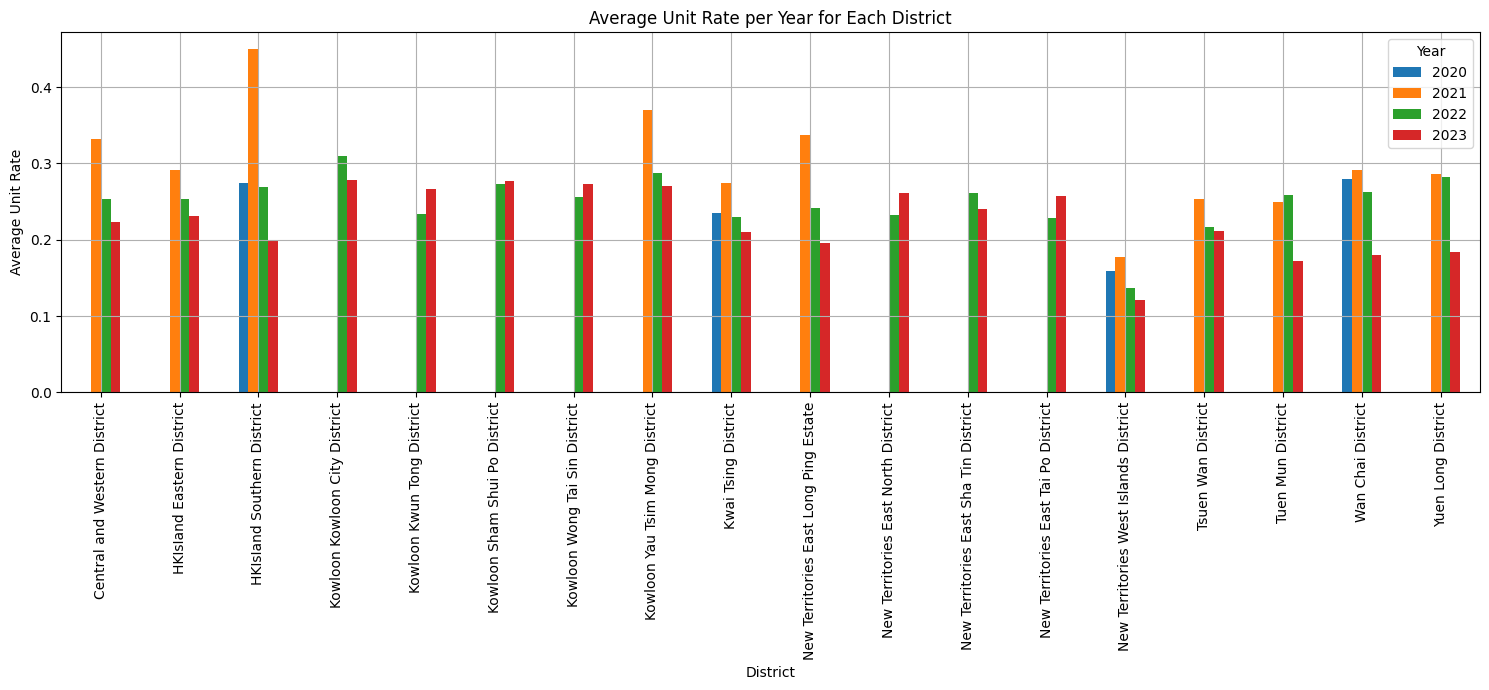

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year from the 'YearQuarter' column
merged_dataset['year'] = merged_dataset['YearQuarter'].str[:4].astype(int)

# Calculate the mean unit_rate for each district per year
average_unit_rate_per_year = merged_dataset.groupby(['district_encoded', 'district', 'year'])['unit_rate'].mean().reset_index()

# Create a pivot table to ensure all combinations of district and year are included
pivot_table = average_unit_rate_per_year.pivot(index='district', columns='year', values='unit_rate')

# Fill missing values with 0 or any other placeholder, if necessary
pivot_table = pivot_table.fillna(0)

# Plot the data
pivot_table.plot(kind='bar', figsize=(15, 7))
plt.xlabel('District')
plt.ylabel('Average Unit Rate')
plt.title('Average Unit Rate per Year for Each District')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

The bar chart illustrates average unit rates per year for each district from 2020 to 2023, with bars colored by year (blue for 2020, orange for 2021, green for 2022, red for 2023). There are significant yearly variations in unit rates across districts, with consistent trends observed in districts like `Central and Western` and `Wan Chai`. Notable differences exist among districts, with `Wan Chai` consistently showing high rates. Some districts lack data for certain years, indicating incomplete datasets. Recommendations include addressing missing data, investigating districts with significant fluctuations, and further analyzing high variability districts like `Wan Chai` to understand contributing factors.

Index(['Unnamed: 0', 'date', 'address', 'changes', 'saleable_area(ft^2)',
       'unit_rate', 'district', 'Tower', 'Flat', 'Phase', 'Block', 'Rental',
       'Public Housing', 'floor', 'YearQuarter', 'CG', 'CI', 'CPI', 'GDP',
       'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR',
       'property_size', 'region', 'new_price', 'district_encoded', 'year'],
      dtype='object')
   Unnamed: 0      date                                        address  \
0         0.0  09-03-23  The Long Beach, Tower 7, Middle Floor, Flat D   
1         1.0  09-03-23  One Kai Tak, II, Tower 3, Upper Floor, Flat H   
2         2.0  08-03-23        Sky Tower, Block 1, Lower Floor, Flat B   
3         3.0  08-03-23    Hampton Place, Tower 2, Upper Floor, Flat F   
4         4.0  08-03-23                  Skypark, Upper Floor, Flat A5   

  changes  saleable_area(ft^2)  unit_rate                       district  \
0      --             0.736570   0.000803  Kowloon Kowloon City District   
1  

<ipython-input-61-5ee7074b73b1>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(years))


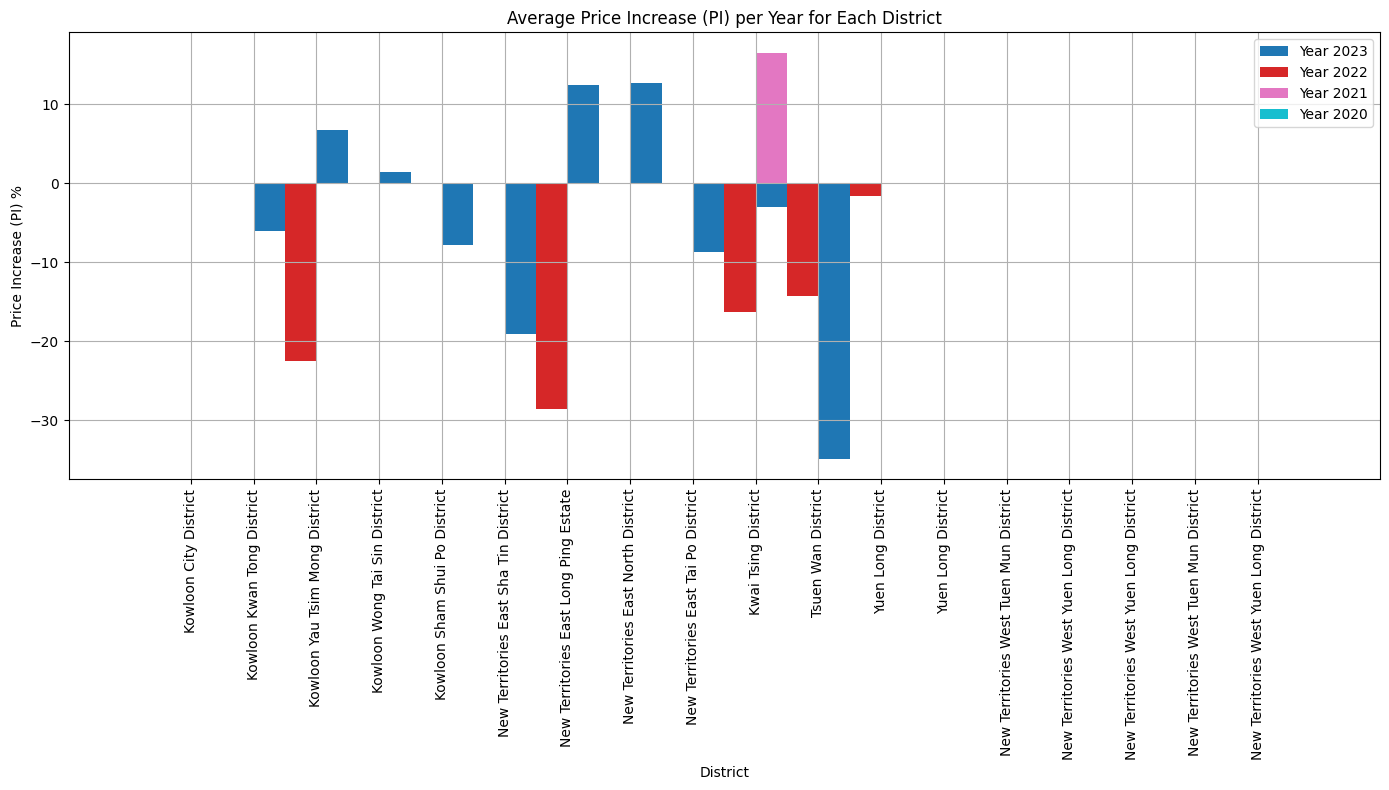

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_dataset is already defined and cleaned
# Check if 'YearQuarter' column exists
column_names = merged_dataset.columns
print(column_names)  # Print column names to verify 'YearQuarter'

if 'YearQuarter' in column_names:
    # Extract the year from the 'YearQuarter' column
    merged_dataset['year'] = merged_dataset['YearQuarter'].str[:4].astype(int)
else:
    raise KeyError("The 'YearQuarter' column does not exist in merged_dataset")

# Print the first few rows to verify 'year' column has been created
print(merged_dataset.head())

# Use `merged_dataset` as `cleaned_dataset` if it represents the cleaned version of your data
cleaned_dataset = merged_dataset

# Calculate the mean unit_rate for each district per year
# Group by 'district_encoded', 'district', and 'year' and calculate the mean 'unit_rate'
average_unit_rate_per_year = cleaned_dataset.groupby(['district_encoded', 'district', 'year']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate_per_year = average_unit_rate_per_year.rename(columns={'unit_rate': 'average_unit_rate'})

# Calculate the Price Increase (PI) for each year and district
# Sort the data by district and year
average_unit_rate_per_year = average_unit_rate_per_year.sort_values(by=['district_encoded', 'year'])

# Calculate the year-over-year price increase
average_unit_rate_per_year['PI'] = average_unit_rate_per_year.groupby('district_encoded')['average_unit_rate'].pct_change() * 100

# Fill NaN values in 'PI' with 0 (or another appropriate value)
average_unit_rate_per_year['PI'] = average_unit_rate_per_year['PI'].fillna(0)

# Manually define all possible districts with their encodings
all_districts = pd.DataFrame({
    'district_encoded': range(1, 19),
    'district': [
        'Kowloon City District', 'Kowloon Kwan Tong District', 'Kowloon Yau Tsim Mong District',
        'Kowloon Wong Tai Sin District', 'Kowloon Sham Shui Po District', 'New Territories East Sha Tin District',
        'New Territories East Long Ping Estate', 'New Territories East North District', 'New Territories East Tai Po District',
        'Kwai Tsing District', 'Tsuen Wan District', 'Yuen Long District', 'Yuen Long District',
        'New Territories West Tuen Mun District', 'New Territories West Yuen Long District',
        'New Territories West Yuen Long District', 'New Territories West Tuen Mun District', 'New Territories West Yuen Long District'
        # Add the remaining district names here if any
    ]
})

# Create a DataFrame with all possible combinations of districts and years
years = cleaned_dataset['year'].unique()
all_combinations = pd.MultiIndex.from_product([all_districts['district_encoded'], years], names=['district_encoded', 'year']).to_frame(index=False)
all_district_year_combinations = pd.merge(all_combinations, all_districts, on='district_encoded')

# Merge the PI with all district-year combinations to ensure all are included
final_table = pd.merge(all_district_year_combinations, average_unit_rate_per_year, on=['district_encoded', 'district', 'year'], how='left')

# Fill NaN values in 'PI' with a placeholder value (e.g., 0 or 'N/A')
final_table['PI'] = final_table['PI'].fillna(0)

# Plot the data as a bar graph
plt.figure(figsize=(14, 8))

# Generate a color map with distinct colors
colors = plt.cm.get_cmap('tab10', len(years))

# Increase the bar width
bar_width = 0.5

# Positions of the bars on the x-axis
r = np.arange(len(all_districts))

# Loop through each year and plot
for i, year in enumerate(years):
    data_for_year = final_table[final_table['year'] == year]
    plt.bar(r + i * bar_width, data_for_year['PI'], width=bar_width, label=f'Year {year}', color=colors(i))

# Set district names as x-ticks
plt.xticks(ticks=r + bar_width * (len(years) - 1) / 2, labels=all_districts['district'], rotation=90)

# Labels and title
plt.xlabel('District')
plt.ylabel('Price Increase (PI) %')
plt.title('Average Price Increase (PI) per Year for Each District')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

# Note: no data from some districts and some years

# Define the targets and the features

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158122 entries, 0 to 159675
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           158122 non-null  float64
 1   date                 158122 non-null  object 
 2   address              158122 non-null  object 
 3   changes              158122 non-null  object 
 4   saleable_area(ft^2)  158122 non-null  float64
 5   unit_rate            158122 non-null  float64
 6   district             158122 non-null  object 
 7   Tower                60395 non-null   object 
 8   Flat                 150707 non-null  object 
 9   Phase                48336 non-null   object 
 10  Block                53620 non-null   object 
 11  Rental               158122 non-null  bool   
 12  Public Housing       158122 non-null  bool   
 13  floor                158122 non-null  float64
 14  YearQuarter          158122 non-null  object 
 15  CG                   1

In [ ]:

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI', 'district', 'YearQuarter'])
target_variables = ['unit_rate', 'new_price', 'PI']


# Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate a decision tree model
def train_and_evaluate_decision_tree(X, y, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)  # Using the model's score method

    print(f"Results for target variable '{target_name}':")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print(f"Accuracy: {accuracy}\n")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Actual vs Predicted {target_name}")
    plt.show()

# Iterate through each target variable and train a Decision Tree model
for target in target_variables:
    y = merged_dataset[target]
    train_and_evaluate_decision_tree(features, y, target)

ValueError: could not convert string to float: '30-07-21'

# Regression Analysis

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158122 entries, 0 to 159675
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           158122 non-null  float64
 1   date                 158122 non-null  object 
 2   address              158122 non-null  object 
 3   changes              158122 non-null  object 
 4   saleable_area(ft^2)  158122 non-null  float64
 5   unit_rate            158122 non-null  float64
 6   district             158122 non-null  object 
 7   Tower                60395 non-null   object 
 8   Flat                 150707 non-null  object 
 9   Phase                48336 non-null   object 
 10  Block                53620 non-null   object 
 11  Rental               158122 non-null  bool   
 12  Public Housing       158122 non-null  bool   
 13  floor                158122 non-null  float64
 14  YearQuarter          158122 non-null  object 
 15  CG                   1

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI', 'district', 'YearQuarter', 'Quarter', 'property_size', 'region'])
target_variables = ['unit_rate', 'new_price', 'PI']

# Function to perform regression analysis
def perform_regression_analysis(target):
    # Define independent variables (X) and dependent variable (y)
    X = features
    y = merged_dataset[target]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Perform Regression Analysis
    # Add a constant term to the independent variables
    X_train_const = sm.add_constant(X_train)

    # Fit the regression model
    model = sm.OLS(y_train, X_train_const).fit()

    # Print the summary of the regression analysis
    print(f"Regression Analysis for {target}:")
    print(model.summary())

    # Visualize the Results
    # Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, model.predict(sm.add_constant(X_test)), alpha=0.3)
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Actual vs Predicted {target}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

    # Residuals plot
    plt.figure(figsize=(10, 6))
    sns.residplot(x=model.predict(sm.add_constant(X_train)), y=y_train, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted')
    plt.show()

    # QQ plot
    sm.qqplot(model.resid, line='45')
    plt.title('Normal Q-Q')
    plt.show()

# Perform regression analysis for each target
for target in target_variables:
    perform_regression_analysis(target)

KeyError: "['Quarter'] not found in axis"

The regression analysis shows:
- **`unit_rate`**: Moderate fit (R² = 0.507). Significant predictors include `saleable_area(ft²)`, `CG`, `HS`, `IR`, `UR`, `new_price`, `district_encoded`, and `year`.
- **`PI`**: Near-perfect fit (R² = 1.000), indicating potential overfitting. Most predictors are significant, with `unit_rate` having a negative impact.
- **`new_price`**: Strong fit (R² = 0.764). Significant predictors are `saleable_area(ft²)`, `unit_rate`, and `year`.

Address overfitting in `PI` by simplifying the model. Improve `unit_rate` model by exploring additional predictors. Validate `new_price` model further with cross-validation.

# MultiCollinearity Analysis

In my property data there is a strong correlation between unit rate, saleable area and price in that if you have two variables you can derive the third variable does this cause a problem in the machine learning

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI', 'district', 'YearQuarter', 'Quarter', 'property_size', 'region'])
target_variables = ['unit_rate', 'new_price', 'PI']

# Function to perform regression analysis
def perform_regression_analysis(target):
    X = features
    y = merged_dataset[target]

    # Calculate VIF to check multicollinearity
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print(f'\nVIF for {target}:')
    print(vif_data)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    ridge_predictions = ridge.predict(X_test)

    # Evaluate Ridge Regression model
    ridge_mse = mean_squared_error(y_test, ridge_predictions)
    ridge_r2 = r2_score(y_test, ridge_predictions)
    print(f'Ridge MSE for {target}: {ridge_mse}')
    print(f'Ridge R2 for {target}: {ridge_r2}')

    # Lasso Regression
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    lasso_predictions = lasso.predict(X_test)

    # Evaluate Lasso Regression model
    lasso_mse = mean_squared_error(y_test, lasso_predictions)
    lasso_r2 = r2_score(y_test, lasso_predictions)
    print(f'Lasso MSE for {target}: {lasso_mse}')
    print(f'Lasso R2 for {target}: {lasso_r2}')

# Perform regression analysis for each target
for target in target_variables:
    perform_regression_analysis(target)

KeyError: "['Quarter'] not found in axis"

The analysis of the property database using Lasso and Ridge regression models shows varying predictive abilities across three targets: `unit_rate`, `new_price`, and `PI`. For `unit_rate` and `new_price`, both models exhibit low R² values, indicating limited explanatory power and suggesting that the models do not capture much of the variance. This implies a need for further feature engineering or exploration of additional variables to improve prediction accuracy. In contrast, the models perform exceptionally well for the `PI` (Price Index), with high R² values indicating a strong fit. This suggests that the features used are well-suited to predicting the PI. Overall, while the models are effective for PI, enhancements are needed for the other targets to achieve more reliable predictions.

# XGBoost

XGBoost (Extreme Gradient Boosting) machine learning algorithm based on gradient boosting, designed for speed and performance. It builds an ensemble of decision trees sequentially, where each tree corrects errors from the previous ones. Key features include regularization to prevent overfitting, handling missing values, and parallel processing for faster computation. XGBoost supports regression, classification, and ranking tasks, and is known for its scalability and accuracy. It is widely used in competitive machine learning and real-world applications due to its robust performance and flexibility.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Sample dataset, replace with your actual data
# merged_dataset = pd.read_csv('your_dataset.csv')

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI', 'district', 'YearQuarter', 'Quarter'])
target_variables = ['unit_rate', 'new_price', 'PI']

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, dep_var):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'Learning Curves for {dep_var}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate over each target variable
for dep_var in target_variables:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = features
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set the parameters for XGBoost
    params = {
        'objective': 'reg:squarederror',
        'max_depth': 6,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eval_metric': 'rmse'
    }

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Train the XGBoost model with different training sizes
    num_boost_round = 100
    for i in range(10, len(X_train), int(len(X_train) / 10)):
        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        dtrain_sample = xgb.DMatrix(X_train_sample, label=y_train_sample)

        # Train the model
        model = xgb.train(params, dtrain_sample, num_boost_round)

        # Predictions on training and test sets
        y_train_pred = model.predict(dtrain_sample)
        y_test_pred = model.predict(dtest)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, dep_var)

KeyError: "['Quarter'] not found in axis"

The XGBoost learning curves for `unit_rate` and `new_price` show that as the number of training examples increases, the training error decreases and stabilizes, indicating effective learning. The validation error starts high but converges with the training error, suggesting that the models are generalizing well without significant overfitting. However, the complexity of the data might require additional features or further parameter tuning to enhance prediction accuracy.

For the `PI` (Price Index), the learning curve reveals excellent model performance. The training error is very low, and the validation error quickly drops to align closely with it, indicating that the model fits the data well and captures the underlying patterns effectively. This suggests that the features used are well-suited for predicting the PI, with a low risk of overfitting. Overall, while the `PI` model performs exceptionally, the `unit_rate` and `new_price` models could benefit from further refinement.

# Feature Engineering

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158122 entries, 0 to 159675
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           158122 non-null  float64
 1   date                 158122 non-null  object 
 2   address              158122 non-null  object 
 3   changes              158122 non-null  object 
 4   saleable_area(ft^2)  158122 non-null  float64
 5   unit_rate            158122 non-null  float64
 6   district             158122 non-null  object 
 7   Tower                60395 non-null   object 
 8   Flat                 150707 non-null  object 
 9   Phase                48336 non-null   object 
 10  Block                53620 non-null   object 
 11  Rental               158122 non-null  bool   
 12  Public Housing       158122 non-null  bool   
 13  floor                158122 non-null  float64
 14  YearQuarter          158122 non-null  object 
 15  CG                   1

# Hyperparameter tuning

In [ ]:
# Optimise the Hyperparamters
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Hyperparameter grid for XGBoost
param_grid = {
    'max_depth': [3, 6, 9],
    'eta': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f'Best parameters for {dep_var}: {best_params}')

    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {dep_var}: {mse}')
    print(f'R-squared for {dep_var}: {r2}')

In [ ]:
# Best parametr based on tuning for XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Sample dataset, replace with your actual data
# merged_dataset = pd.read_csv('your_dataset.csv')

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI', 'district', 'YearQuarter', 'Quarter'])
target_variables = ['unit_rate', 'new_price', 'PI']

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, dep_var):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'Learning Curves for {dep_var}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate over each target variable
for dep_var in target_variables:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = features
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set the parameters for XGBoost based on best results
    if dep_var == 'new_price':
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 9,
            'eta': 0.1,
            'subsample': 1.0,
            'colsample_bytree': 1.0,
            'n_estimators': 100,
            'eval_metric': 'rmse'
        }
    elif dep_var == 'PI':
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 6,
            'eta': 0.2,
            'subsample': 1.0,
            'colsample_bytree': 0.6,
            'n_estimators': 100,
            'eval_metric': 'rmse'
        }
    elif dep_var == 'unit_rate':
        params = {
            'objective': 'reg:squarederror',
            'max_depth': 9,
            'eta': 0.2,
            'subsample': 1.0,
            'colsample_bytree': 1.0,
            'n_estimators': 100,
            'eval_metric': 'rmse'
        }

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Train the XGBoost model with different training sizes
    num_boost_round = 100
    for i in range(10, len(X_train), int(len(X_train) / 10)):
        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        dtrain_sample = xgb.DMatrix(X_train_sample, label=y_train_sample)

        # Train the model
        model = xgb.train(params, dtrain_sample, num_boost_round)

        # Predictions on training and test sets
        y_train_pred = model.predict(dtrain_sample)
        y_test_pred = model.predict(dtest)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, dep_var)

#MLP

MLP (Multi-Layer Perceptron) models should be effective for forecasting `new_price`, `PI`, and `unit_rate` due to their ability to capture non-linear relationships and handle complex datasets. It offers flexibility and scalability, making them suitable for diverse forecasting tasks. Overfitting is a risk, necessitating regularization and cross-validation. Despite being less interpretable, MLPs provide robust, accurate predictions when properly managed, making them valuable for time series forecasting and other predictive tasks.

In [ ]:
merged_dataset.info()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI', 'district', 'YearQuarter', 'Quarter'])
target_variables = ['unit_rate', 'new_price', 'PI']

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, dep_var):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'Learning Curves for {dep_var}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Check for data issues
print("Data summary:")
print(merged_dataset.describe())
print("Missing values:", merged_dataset.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Iterate over each target variable
for dep_var in target_variables:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the target variable (y)
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Create a simpler MLP model
    model = MLPRegressor(hidden_layer_sizes=(10,),  # Simple model
                         activation='relu',
                         max_iter=1000,  # Reduced iterations for testing
                         random_state=42,
                         early_stopping=True,
                         learning_rate_init=0.001,
                         solver='adam',
                         tol=1e-4)

    # Train the MLP model with different training sizes
    for i in range(20, len(X_train), max(1, len(X_train) // 10)):
        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        # Train the model
        print(f"Training model with {i} samples...")
        model.fit(X_train_sample, y_train_sample)

        # Predictions on training and test sets
        y_train_pred = model.predict(X_train_sample)
        y_test_pred = model.predict(X_test)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, dep_var)

    print(f"Finished training for {dep_var}.")

# Combine features

In [ ]:
# Assuming 'district_encoded' columns are already present

# Create interaction features with 'saleable_area(ft^2)'
district_cols = merged_dataset.filter(like='district_encoded_').columns

# Initialize a new column for the combined interaction
merged_dataset['combined_area_interaction'] = 0

for col in district_cols:
    merged_dataset['combined_area_interaction'] += merged_dataset[col] * merged_dataset['saleable_area(ft^2)']

# Display the updated DataFrame
merged_dataset.info()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Define the feature matrix (X) including the new interaction feature
features = merged_dataset.drop(columns=['district', 'YearQuarter', 'Quarter'])
features['combined_area_interaction'] = merged_dataset['combined_area_interaction']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Define a parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [3000, 4000]  # Increased iterations
}

# Iterate over each target variable
target_variables = ['unit_rate', 'new_price', 'PI']
for dep_var in target_variables:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the target variable (y)
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(MLPRegressor(random_state=42, early_stopping=True), param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Evaluate the model
    y_test_pred = best_model.predict(X_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f'Test Error for {dep_var}: {test_error}')

    # Print best parameters
    print(f'Best parameters for {dep_var}: {grid_search.best_params_}')